# Using `sklearn` Surrogates in `spotPython` {#sec-sklearn-surrogates}

Besides the internal kriging surrogate, which is used as a default by `spotPython`, any surrogate model from `scikit-learn` can be used as a surrogate in `spotPython`. This chapter explains how to use `scikit-learn` surrogates in `spotPython`.


In [1]:
import numpy as np
from math import inf
from spotPython.fun.objectivefunctions import analytical
from spotPython.spot import spot

Seed set to 123


## Example: Branin Function with `spotPython`'s Internal Kriging Surrogate

### The Objective Function Branin

* The `spotPython` package provides several classes of objective functions.
* We will use an analytical objective function, i.e., a function that can be described by a (closed) formula.
* Here we will use the Branin function:

        y = a * (x2 - b * x1**2 + c * x1 - r) ** 2 + s * (1 - t) * np.cos(x1) + s,
        where values of a, b, c, r, s and t are: a = 1, b = 5.1 / (4*pi**2),
        c = 5 / pi, r = 6, s = 10 and t = 1 / (8*pi).

* It has three global minima:


        f(x) = 0.397887 at (-pi, 12.275), (pi, 2.275), and (9.42478, 2.475).


In [2]:
from spotPython.fun.objectivefunctions import analytical
fun = analytical().fun_branin

:::{.callout-note}
#### TensorBoard

Similar to the one-dimensional case, which was introduced in Section @sec-visualizing-tensorboard-01, we can use TensorBoard to monitor the progress of the optimization. We will use the same code, only the prefix is different:


In [3]:
from spotPython.utils.init import fun_control_init, design_control_init
PREFIX = "04"
fun_control = fun_control_init(
    PREFIX=PREFIX,
    lower = np.array([-5,-0]),
    upper = np.array([10,15]),
    fun_evals=20,
    max_time=inf)

design_control = design_control_init(
    init_size=10)

Seed set to 123


Created spot_tensorboard_path: runs/spot_logs/04_p040025_2024-01-14_14-58-56 for SummaryWriter()


:::

### Running the surrogate model based optimizer `Spot`:


In [4]:
spot_2 = spot.Spot(fun=fun,
                   fun_control=fun_control,
                   design_control=design_control)

In [5]:
spot_2.run()

spotPython tuning: 3.146824136952164 [######----] 55.00% 


spotPython tuning: 3.146824136952164 [######----] 60.00% 


spotPython tuning: 3.146824136952164 [######----] 65.00% 


spotPython tuning: 3.146824136952164 [#######---] 70.00% 


spotPython tuning: 1.1487233101571483 [########--] 75.00% 


spotPython tuning: 1.0236891516766402 [########--] 80.00% 


spotPython tuning: 0.41994270072214057 [########--] 85.00% 


spotPython tuning: 0.40193544341108023 [#########-] 90.00% 


spotPython tuning: 0.3991519598268951 [##########] 95.00% 


spotPython tuning: 0.3991519598268951 [##########] 100.00% Done...



### TensorBoard

Now we can start TensorBoard in the background with the following command:



```{raw}
tensorboard --logdir="./runs"
```



We can access the TensorBoard web server with the following URL:



```{raw}
http://localhost:6006/
```



The TensorBoard plot illustrates how `spotPython` can be used as a microscope for the internal mechanisms of the surrogate-based optimization process. Here, one important parameter, the learning rate $\theta$ of the Kriging surrogate is plotted against the number of optimization steps.

![TensorBoard visualization of the spotPython optimization process and the surrogate model.](figures_static/04_tensorboard_01.png){width="100%"}



### Print the Results


In [6]:
spot_2.print_results()

min y: 0.3991519598268951
x0: 3.1546575195040987
x1: 2.285931113926263


[['x0', 3.1546575195040987], ['x1', 2.285931113926263]]

### Show the Progress and the Surrogate


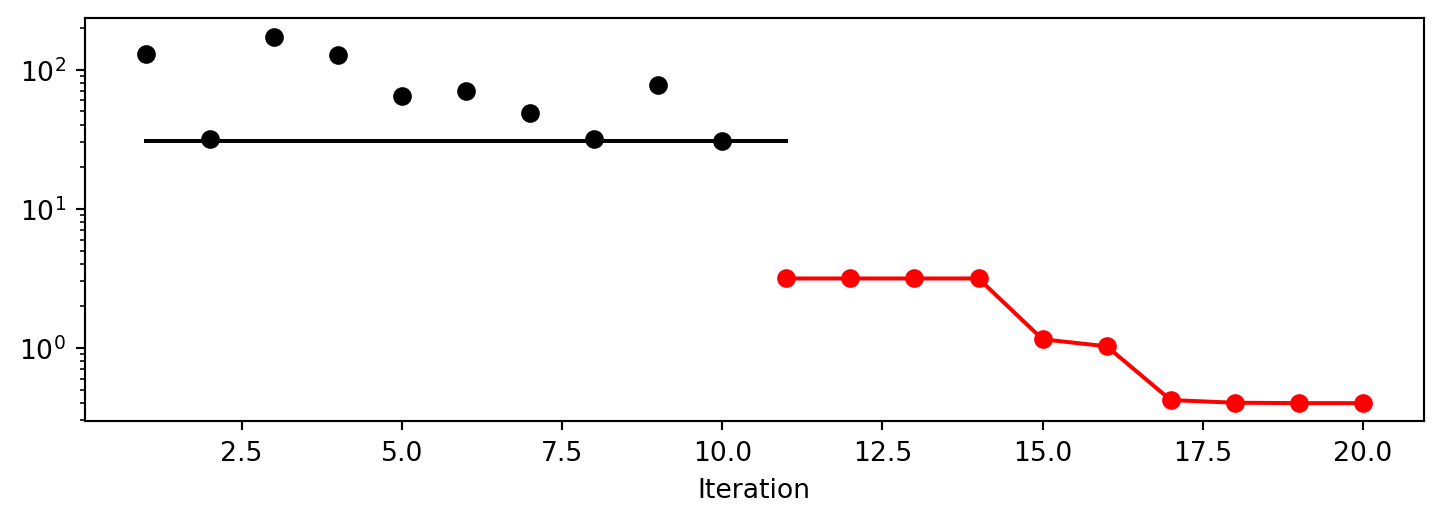

In [7]:
spot_2.plot_progress(log_y=True)

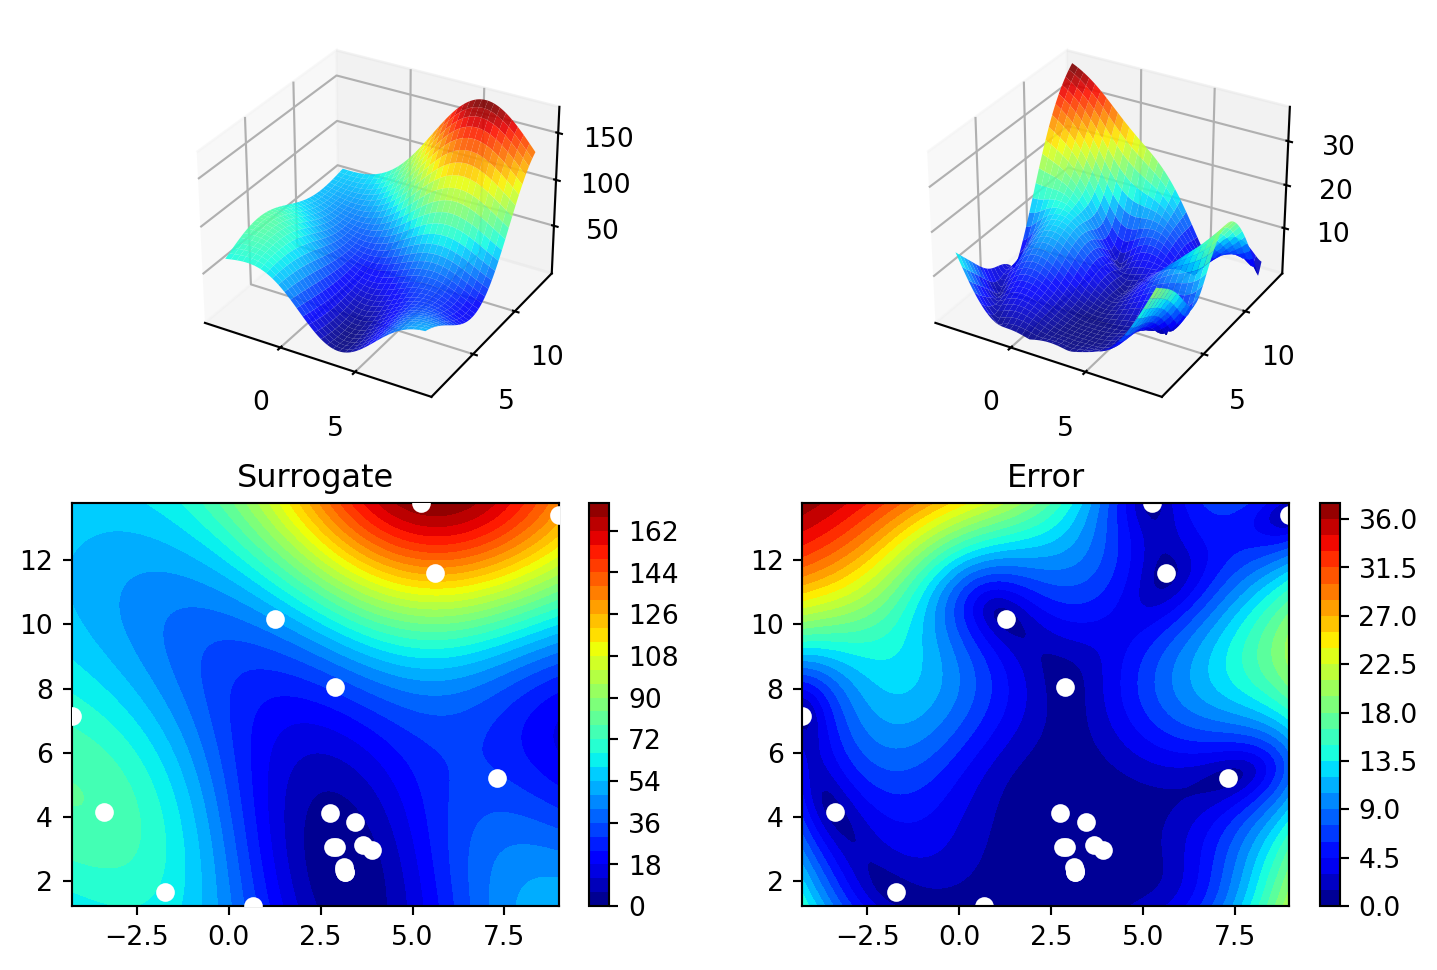

In [8]:
spot_2.surrogate.plot()

## Example: Using Surrogates From scikit-learn

* Default is the `spotPython` (i.e., the internal) `kriging` surrogate.
* It can be called explicitely and passed to `Spot`.


In [9]:
from spotPython.build.kriging import Kriging
S_0 = Kriging(name='kriging', seed=123)

* Alternatively, models from `scikit-learn` can be selected, e.g., Gaussian Process, RBFs, Regression Trees, etc.


In [10]:
# Needed for the sklearn surrogates:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn import tree
import pandas as pd

* Here are some additional models that might be useful later:


In [11]:
S_Tree = DecisionTreeRegressor(random_state=0)
S_LM = linear_model.LinearRegression()
S_Ridge = linear_model.Ridge()
S_RF = RandomForestRegressor(max_depth=2, random_state=0)

### GaussianProcessRegressor as a Surrogate

* To use a Gaussian Process model from `sklearn`, that is similar to `spotPython`'s `Kriging`, we can proceed as follows:


In [12]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
S_GP = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

* The scikit-learn GP model `S_GP` is selected for `Spot` as follows: 

    `surrogate = S_GP`

* We can check the kind of surogate model with the command `isinstance`:


In [13]:
isinstance(S_GP, GaussianProcessRegressor) 

True

In [14]:
isinstance(S_0, Kriging)

True

* Similar to the `Spot` run with the internal `Kriging` model, we can call the run with the `scikit-learn` surrogate:


In [15]:
fun = analytical(seed=123).fun_branin
spot_2_GP = spot.Spot(fun=fun,
                     fun_control=fun_control,
                     design_control=design_control,
                     surrogate = S_GP)
spot_2_GP.run()

spotPython tuning: 18.865121449825782 [######----] 55.00% 


spotPython tuning: 4.06700305855078 [######----] 60.00% 


spotPython tuning: 3.461906927549384 [######----] 65.00% 


spotPython tuning: 3.461906927549384 [#######---] 70.00% 


spotPython tuning: 1.3280944252046556 [########--] 75.00% 


spotPython tuning: 0.9548334920645392 [########--] 80.00% 


spotPython tuning: 0.9344485781421579 [########--] 85.00% 


spotPython tuning: 0.39916716809341857 [#########-] 90.00% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



spotPython tuning: 0.3982254000779708 [##########] 95.00% 


spotPython tuning: 0.3982254000779708 [##########] 100.00% Done...



/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



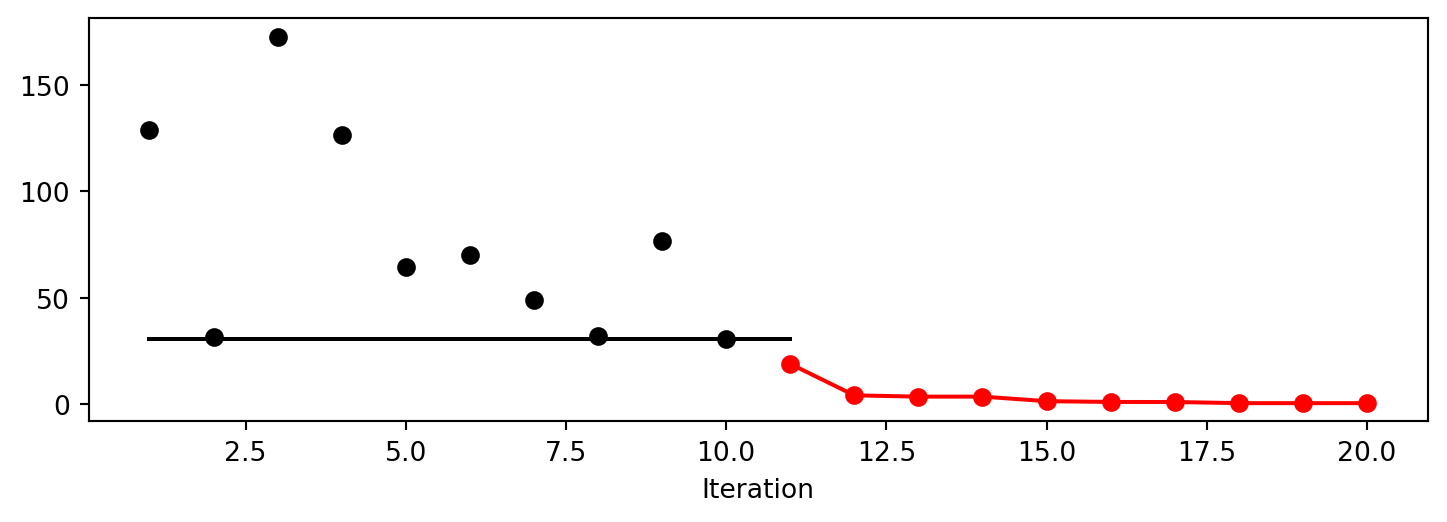

In [16]:
spot_2_GP.plot_progress()

In [17]:
spot_2_GP.print_results()

min y: 0.3982254000779708
x0: 3.1499822680266343
x1: 2.268811272474469


[['x0', 3.1499822680266343], ['x1', 2.268811272474469]]

## Example: One-dimensional Sphere Function With `spotPython`'s Kriging

* In this example, we will use an one-dimensional function, which allows us to visualize the optimization process.
  * `show_models= True` is added to the argument list.


In [18]:
from spotPython.fun.objectivefunctions import analytical
fun_control = fun_control_init(
    lower = np.array([-1]),
    upper = np.array([1]),
    fun_evals=10,
    max_time=inf,
    show_models= True,
    tolerance_x = np.sqrt(np.spacing(1)))
fun = analytical(seed=123).fun_sphere
design_control = design_control_init(
    init_size=3)

Seed set to 123


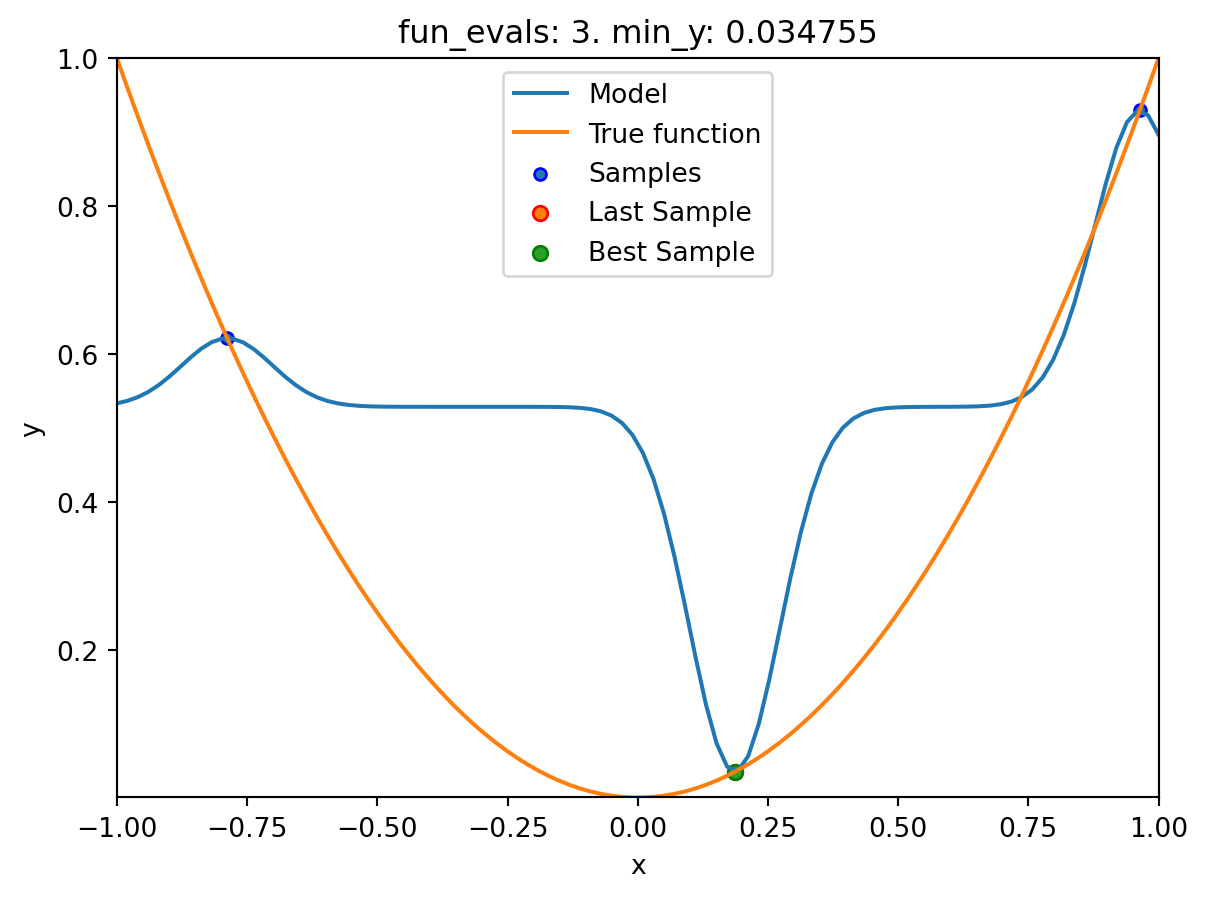

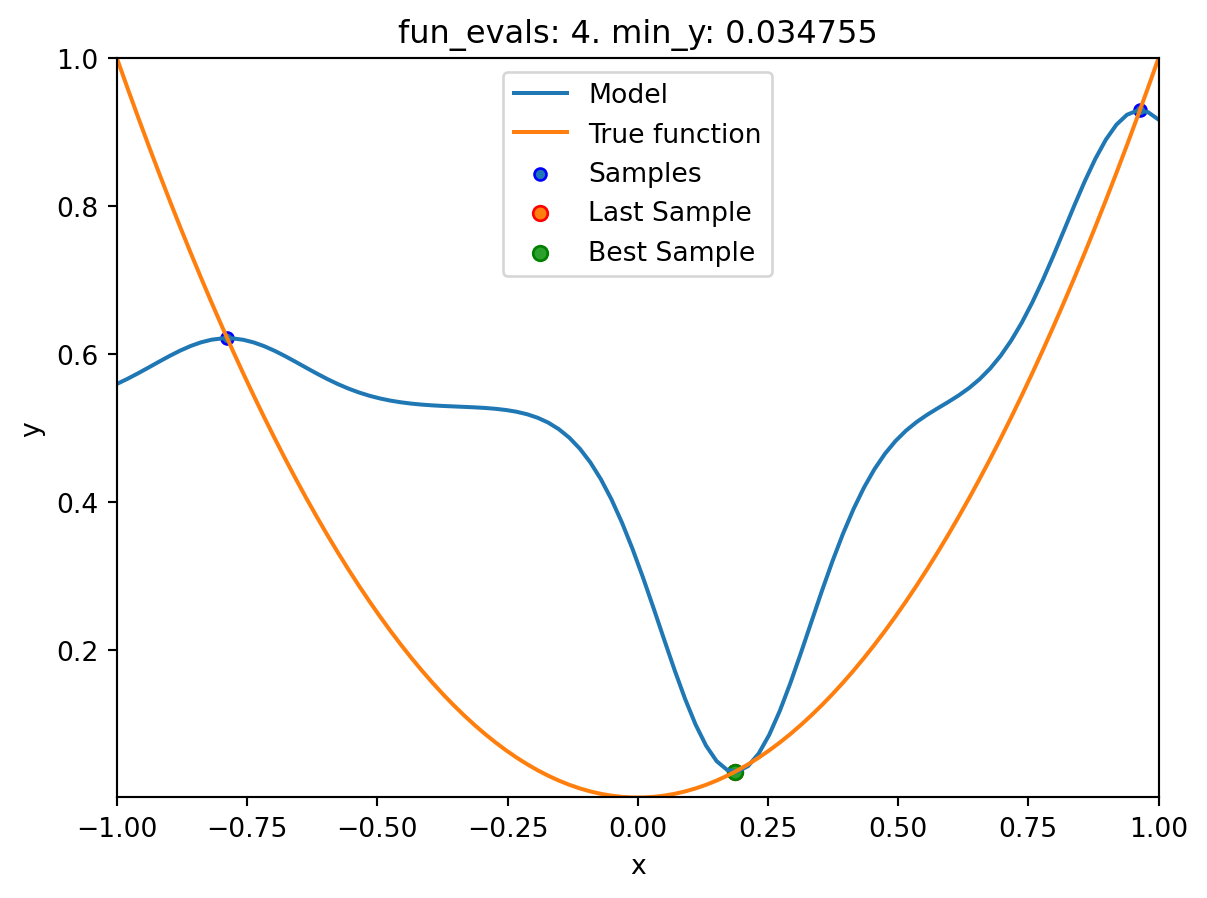

spotPython tuning: 0.03475493366922229 [####------] 40.00% 


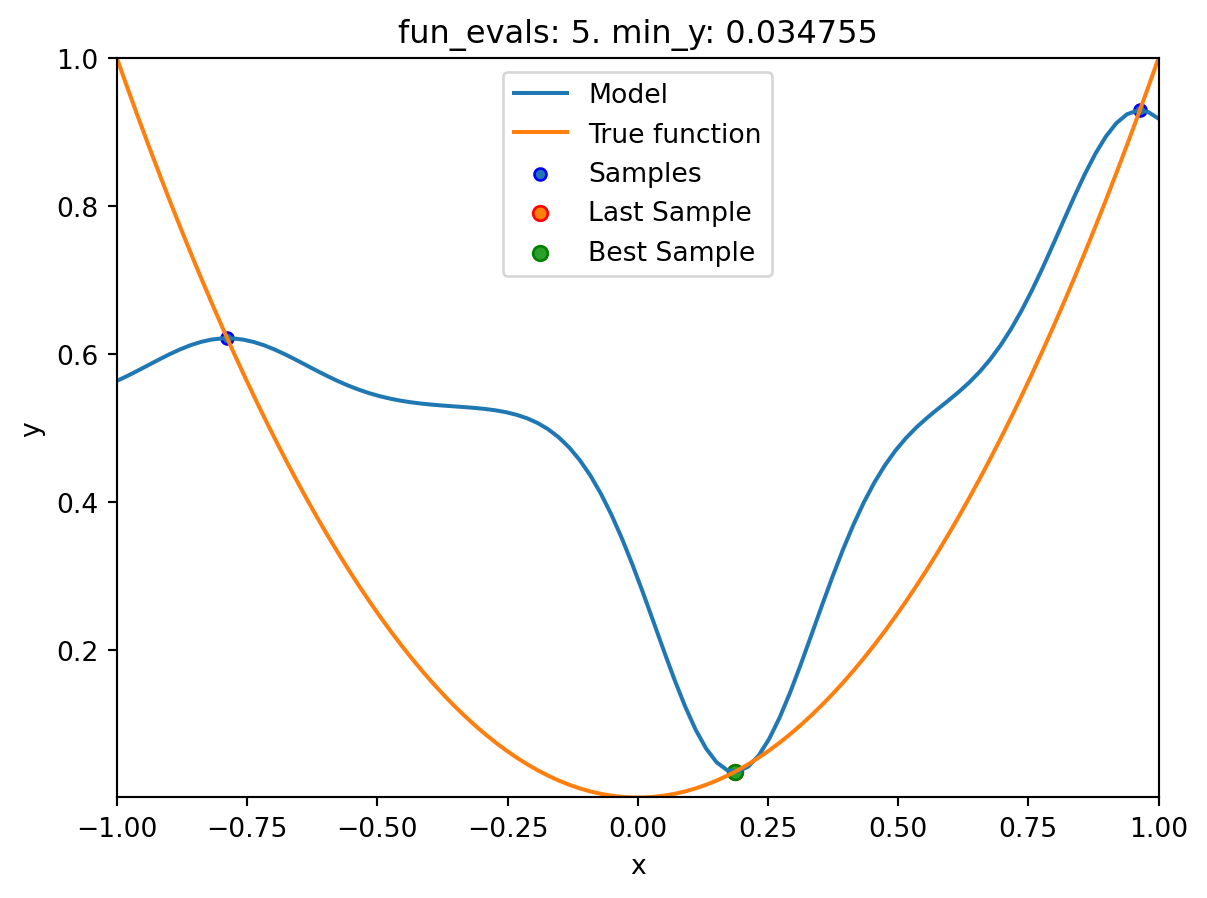

spotPython tuning: 0.03475483461229862 [#####-----] 50.00% 


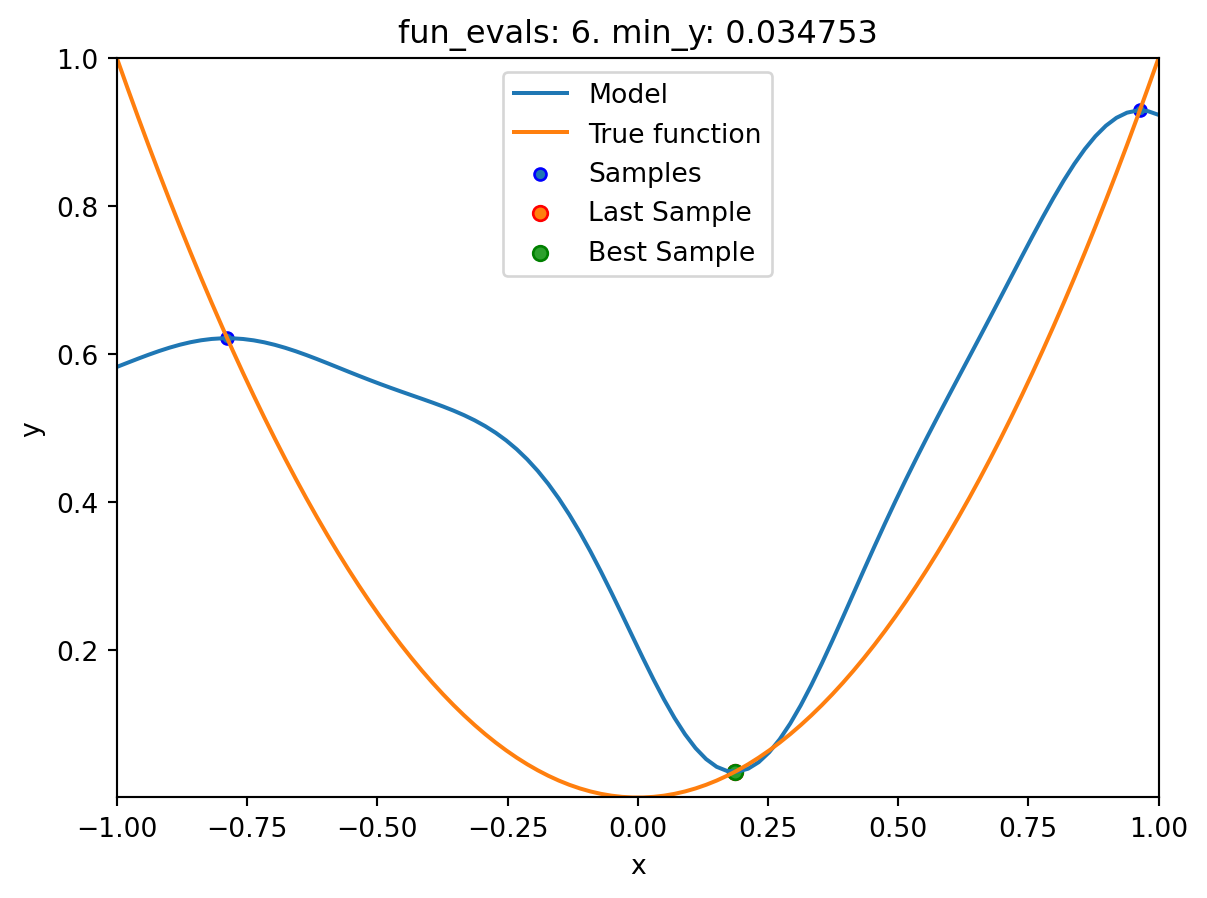

spotPython tuning: 0.03475338954992179 [######----] 60.00% 


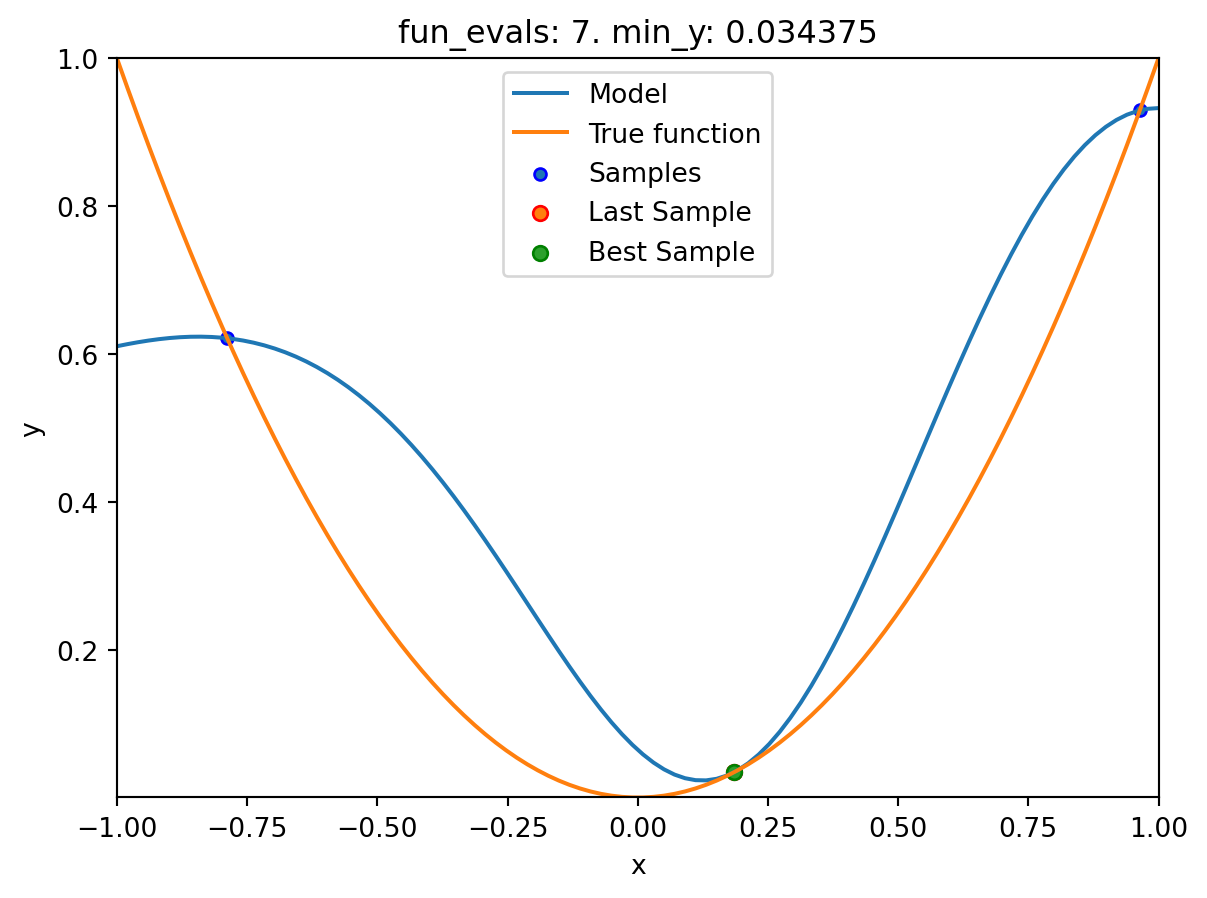

spotPython tuning: 0.03437475313644103 [#######---] 70.00% 


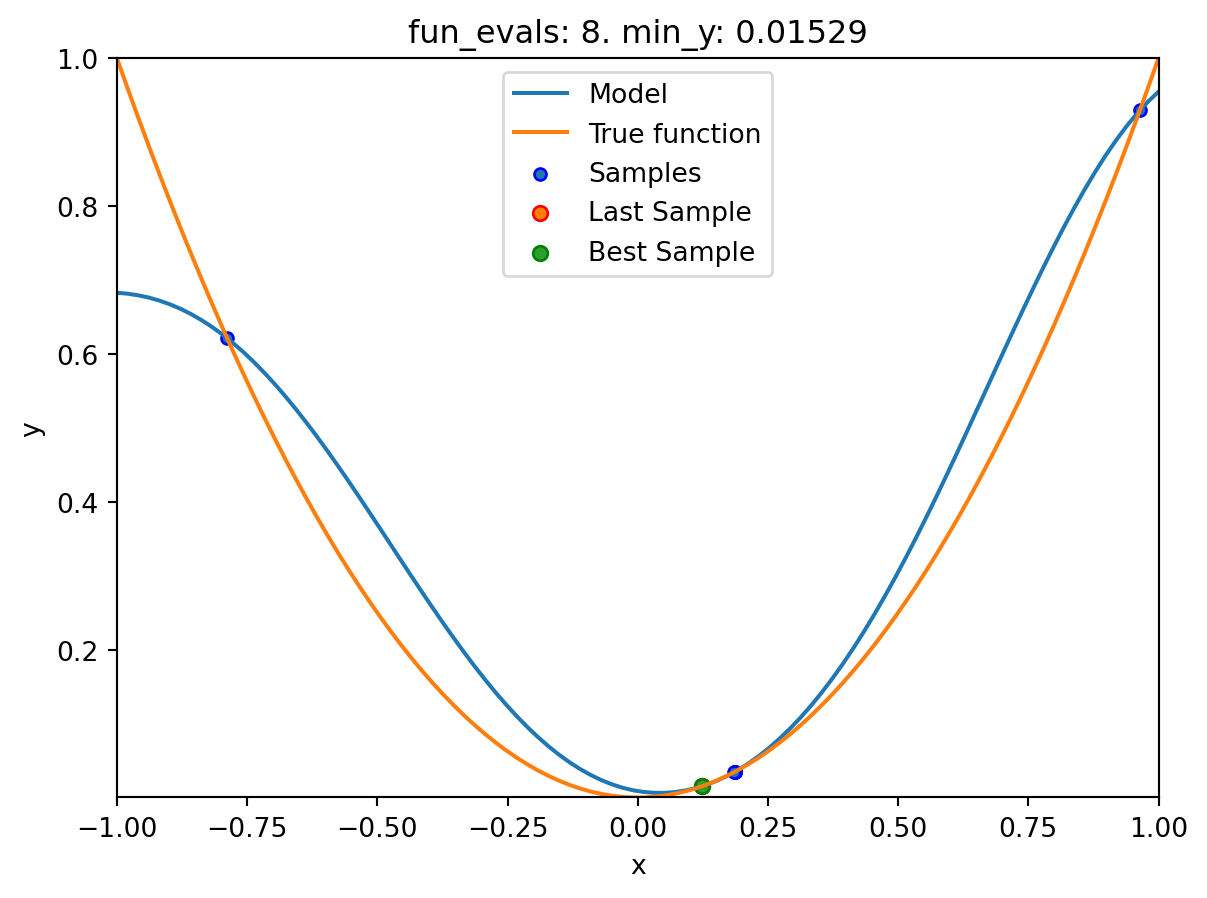

spotPython tuning: 0.015290217643803946 [########--] 80.00% 


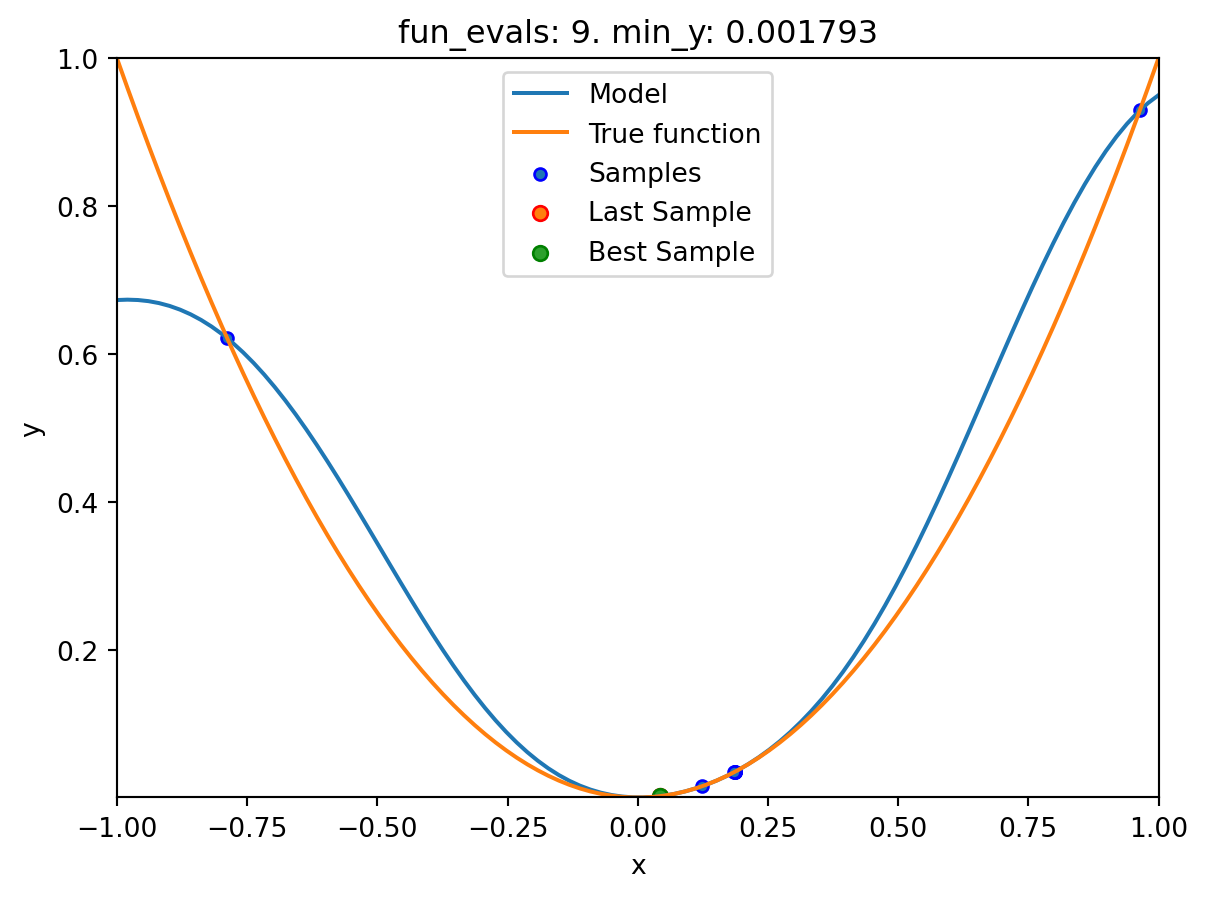

spotPython tuning: 0.0017932523576966073 [#########-] 90.00% 


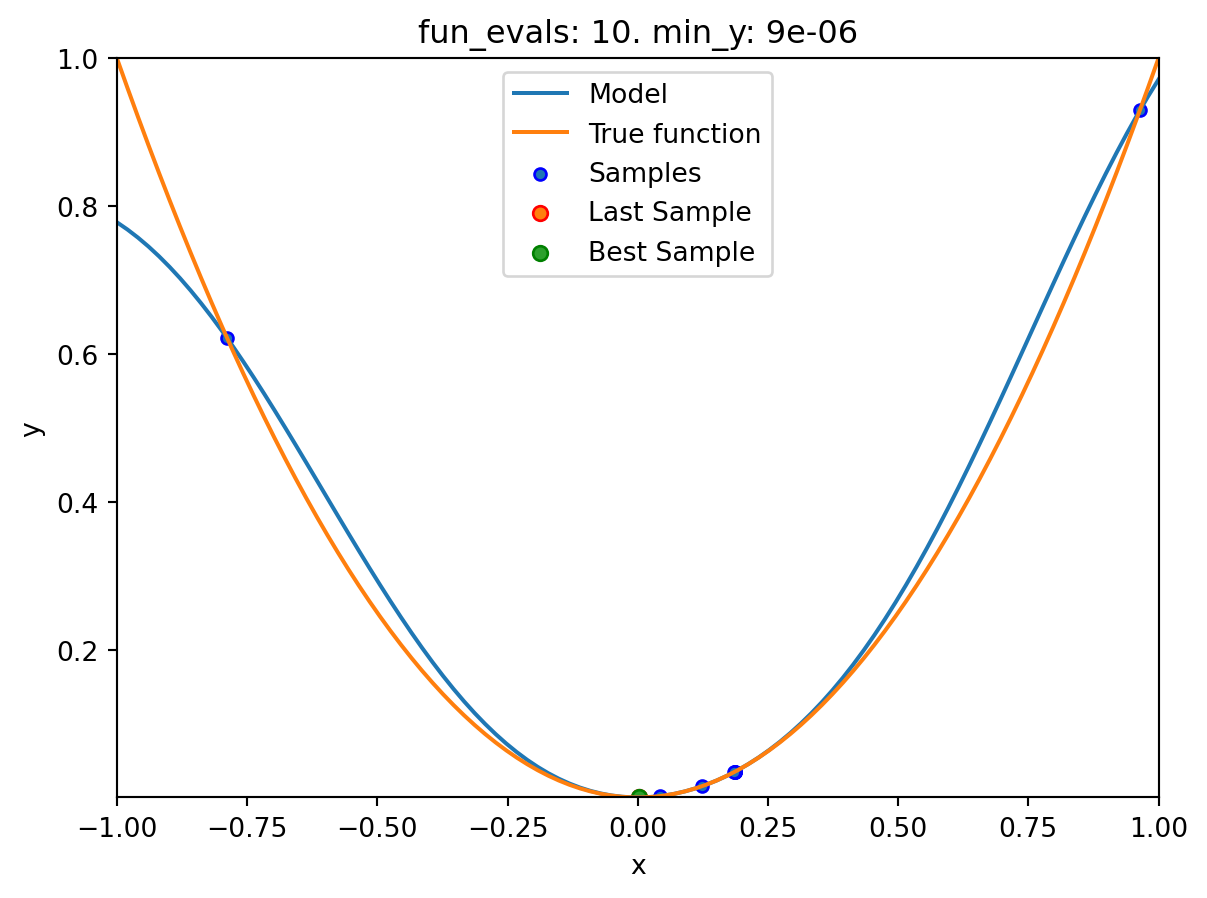

spotPython tuning: 8.771851669068651e-06 [##########] 100.00% Done...



In [19]:
spot_1 = spot.Spot(fun=fun,
                    fun_control=fun_control,
                    design_control=design_control)
spot_1.run()

### Results


In [20]:
spot_1.print_results()

min y: 8.771851669068651e-06
x0: 0.002961731194600322


[['x0', 0.002961731194600322]]

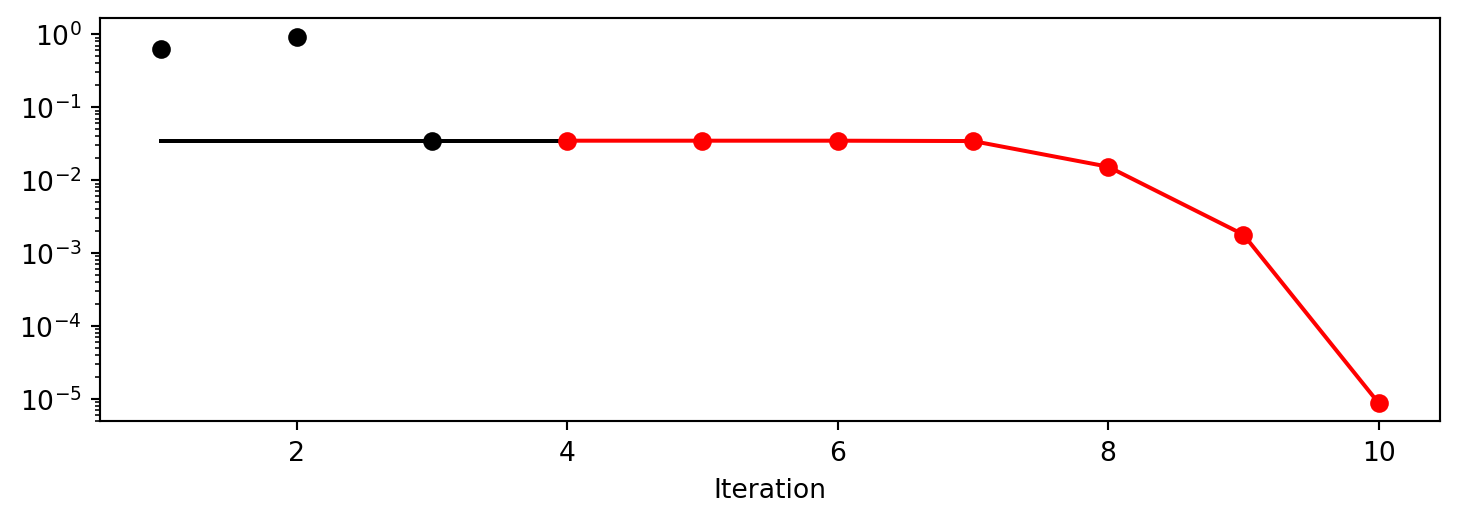

In [21]:
spot_1.plot_progress(log_y=True)

* The method `plot_model` plots the final surrogate:


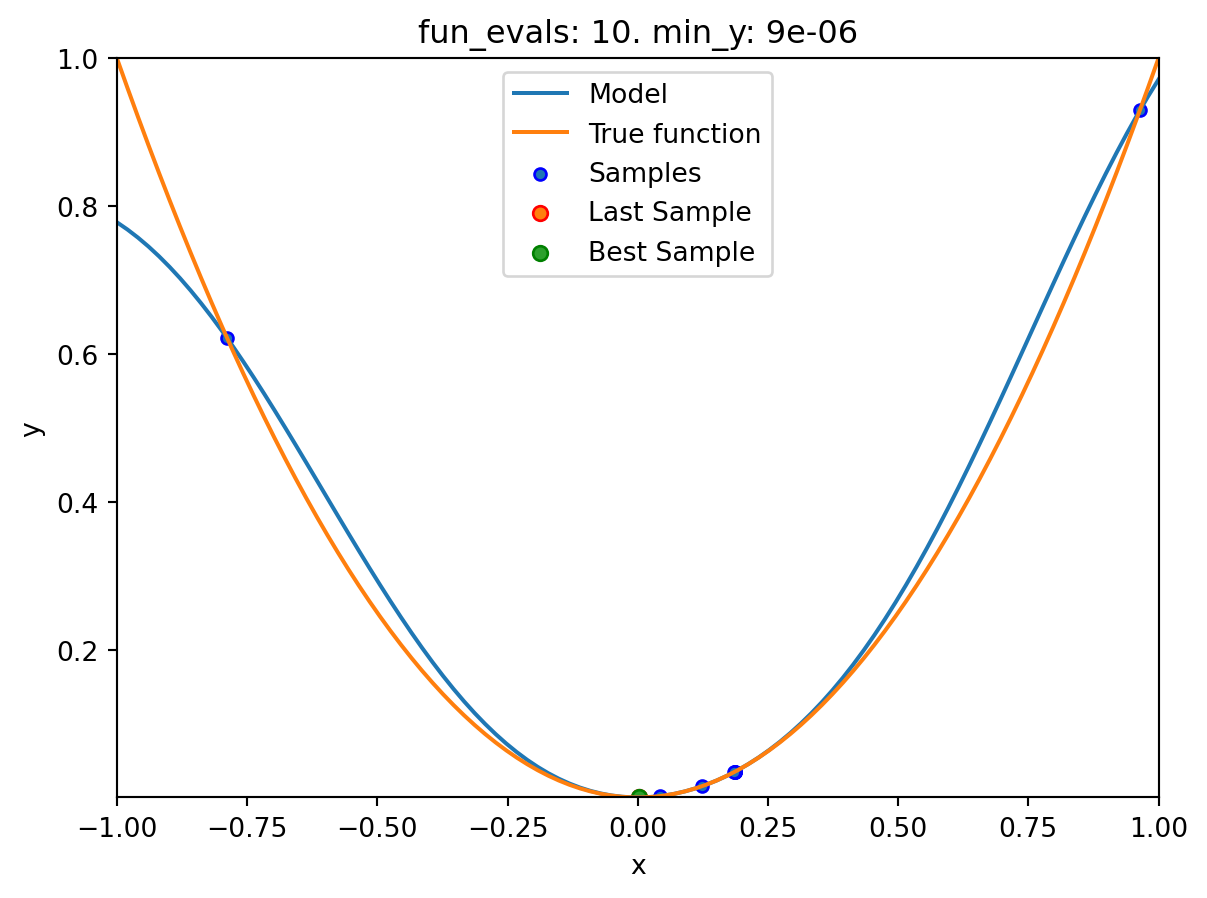

In [22]:
spot_1.plot_model()

## Example: `Sklearn` Model GaussianProcess

* This example visualizes the search process on the `GaussianProcessRegression` surrogate from `sklearn`.
* Therefore `surrogate = S_GP` is added to the argument list.


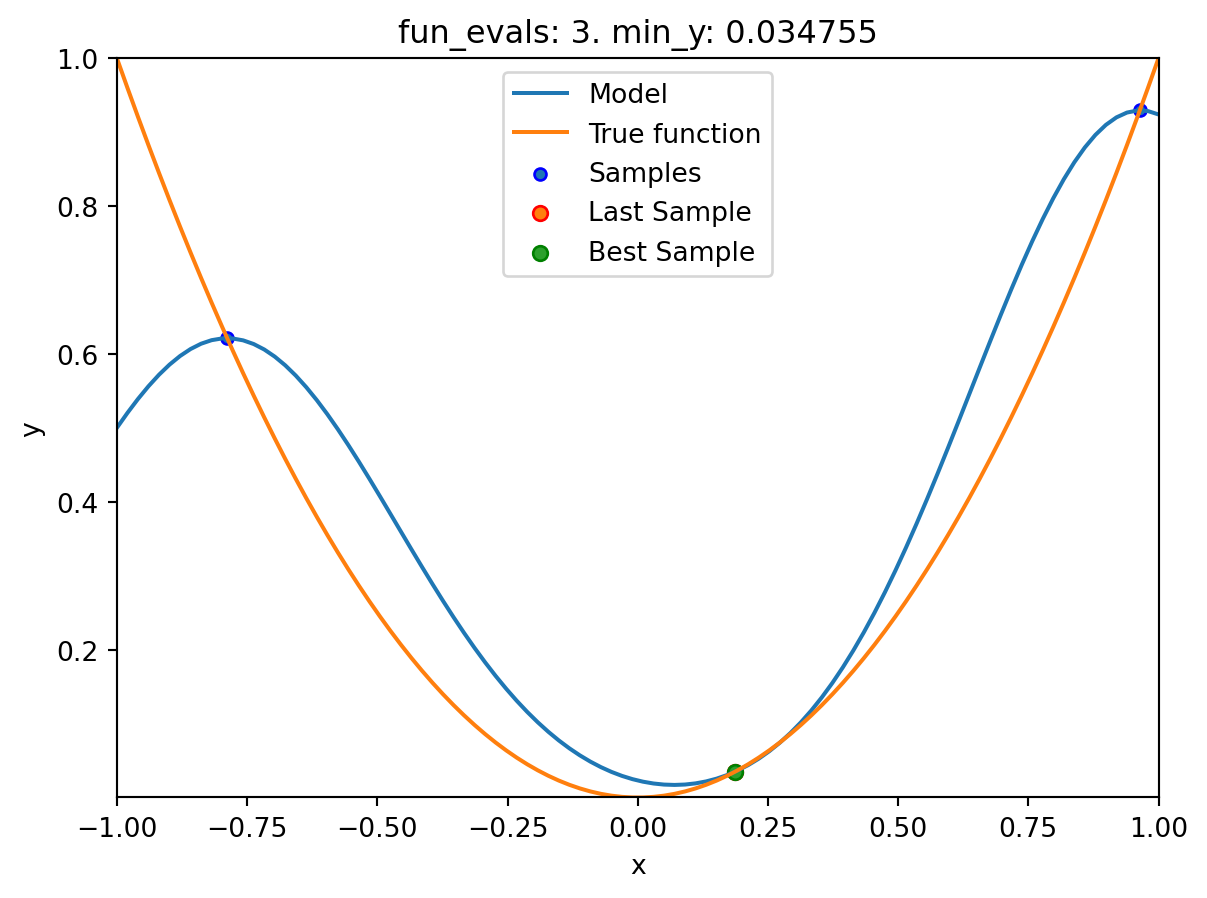

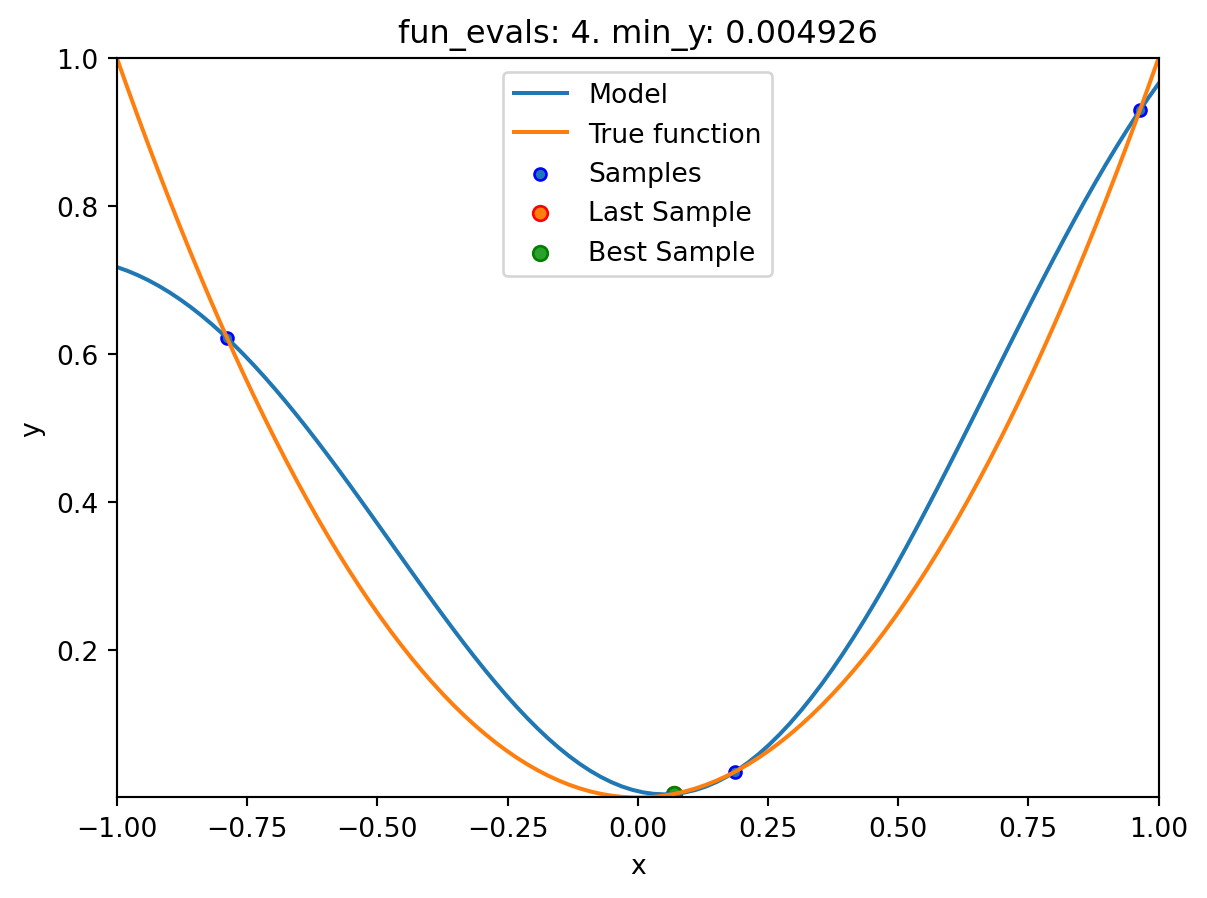

spotPython tuning: 0.004925671374769521 [####------] 40.00% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



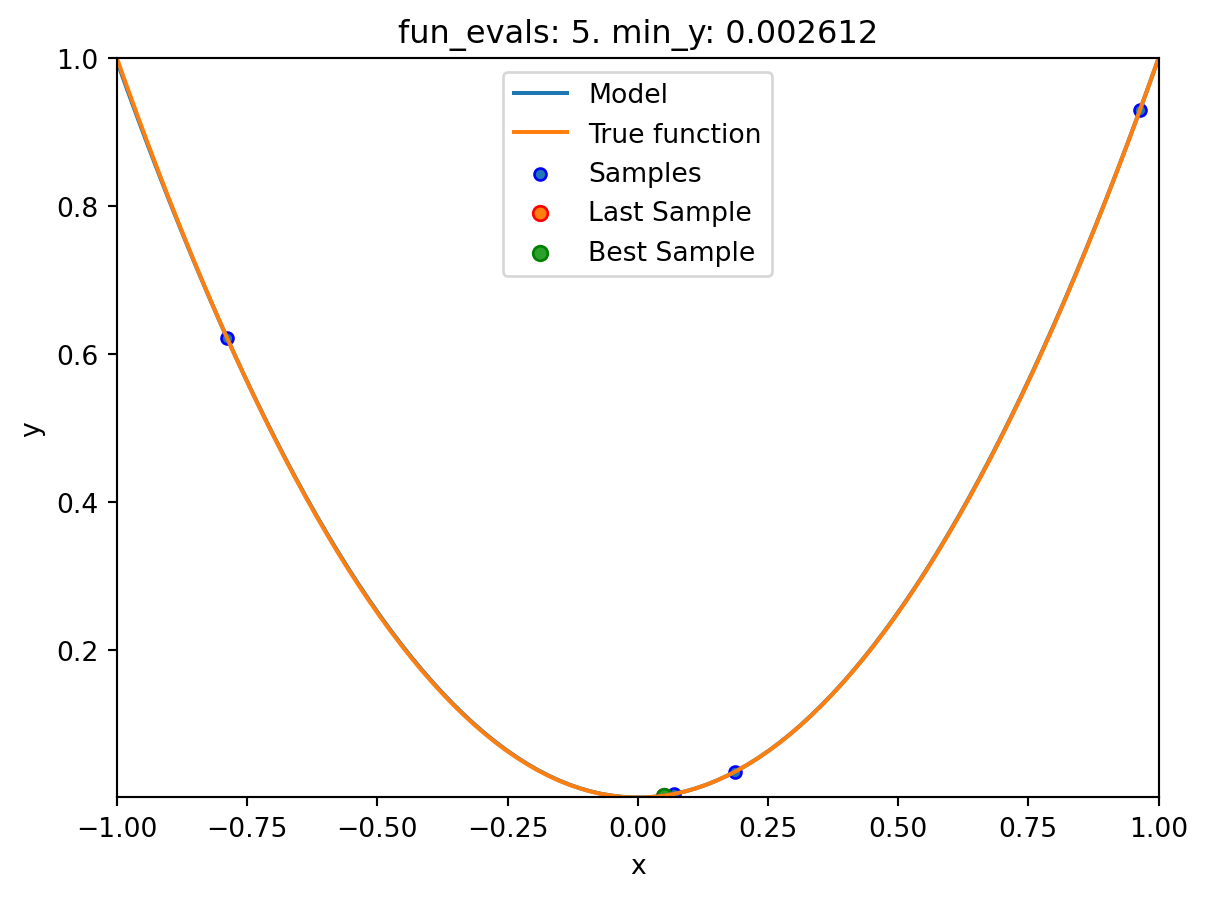

spotPython tuning: 0.002612062924748803 [#####-----] 50.00% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



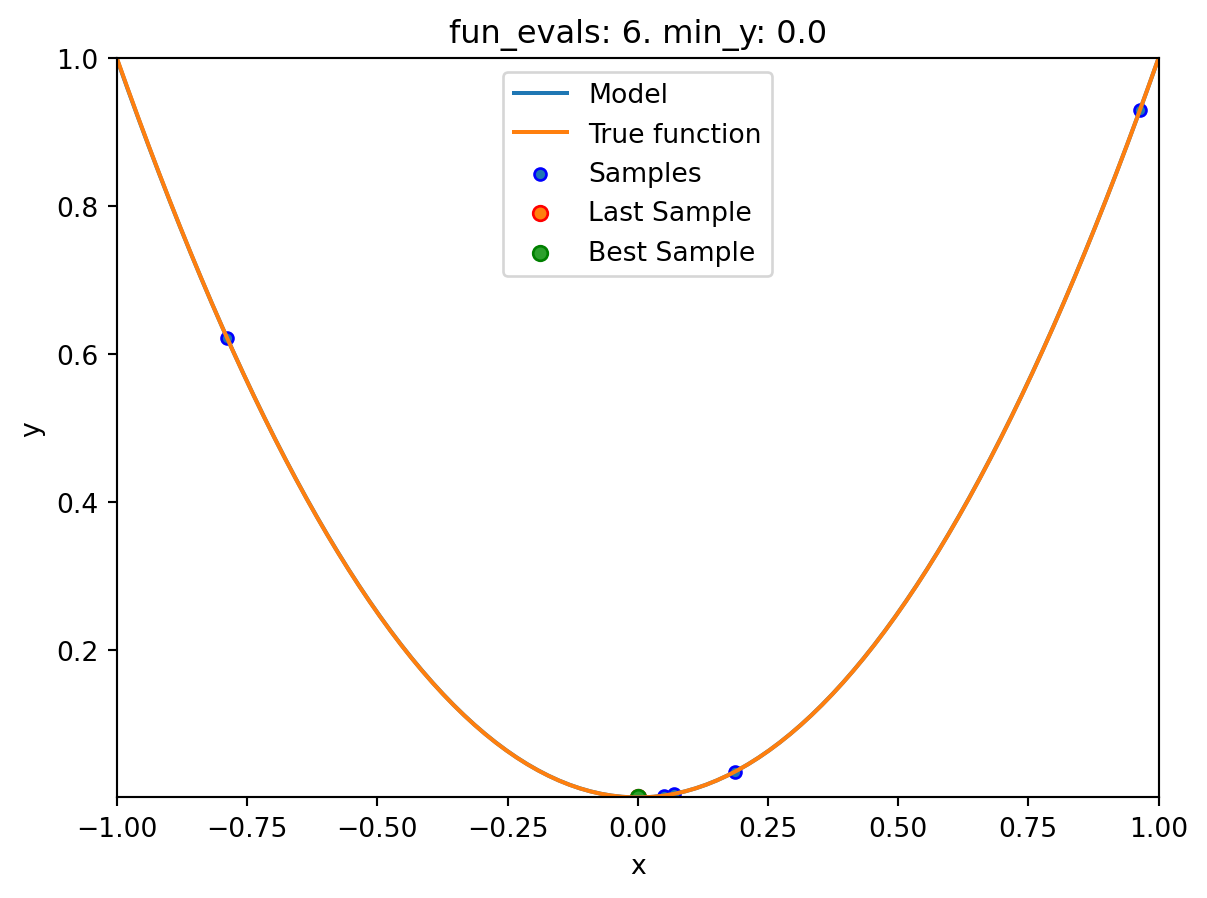

spotPython tuning: 3.6666409852957783e-07 [######----] 60.00% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



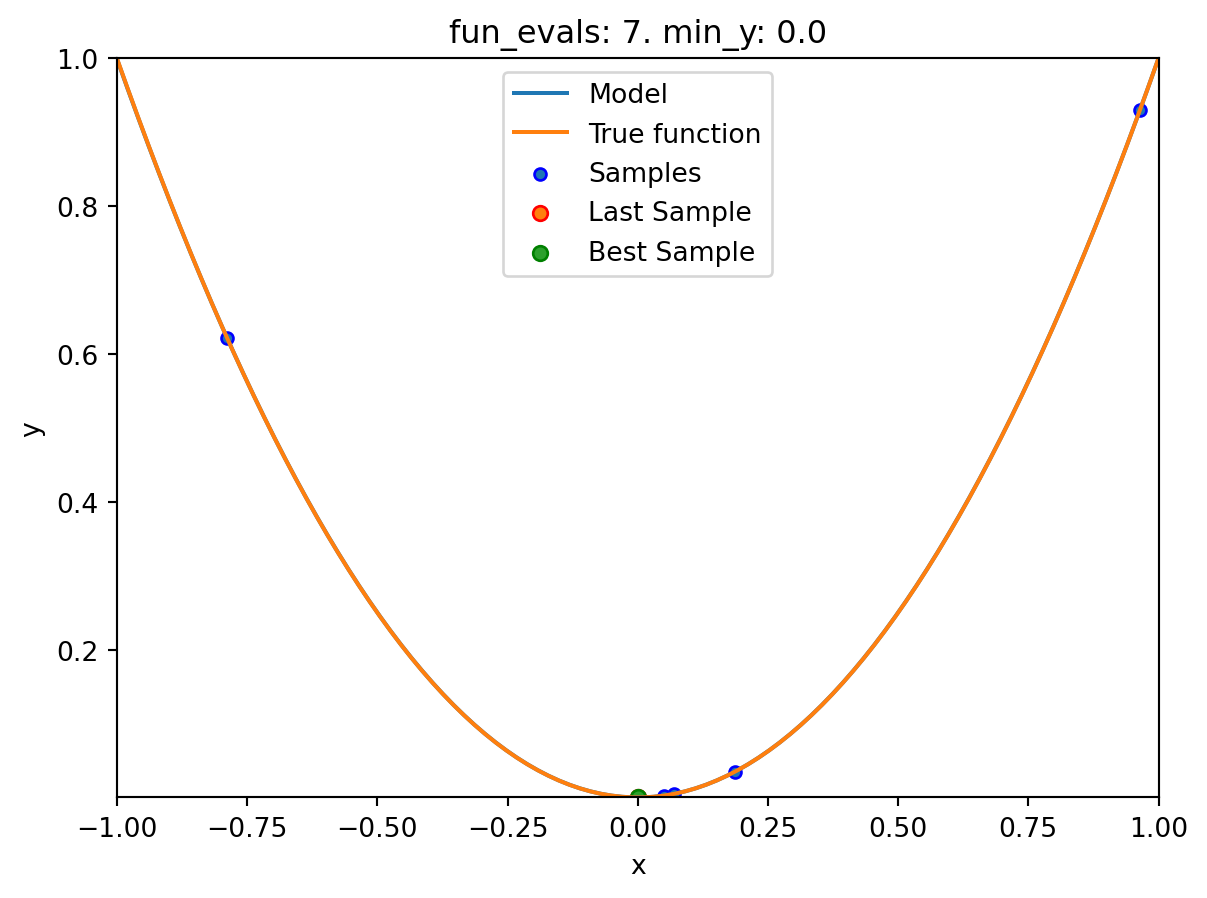

spotPython tuning: 4.638244203084832e-08 [#######---] 70.00% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



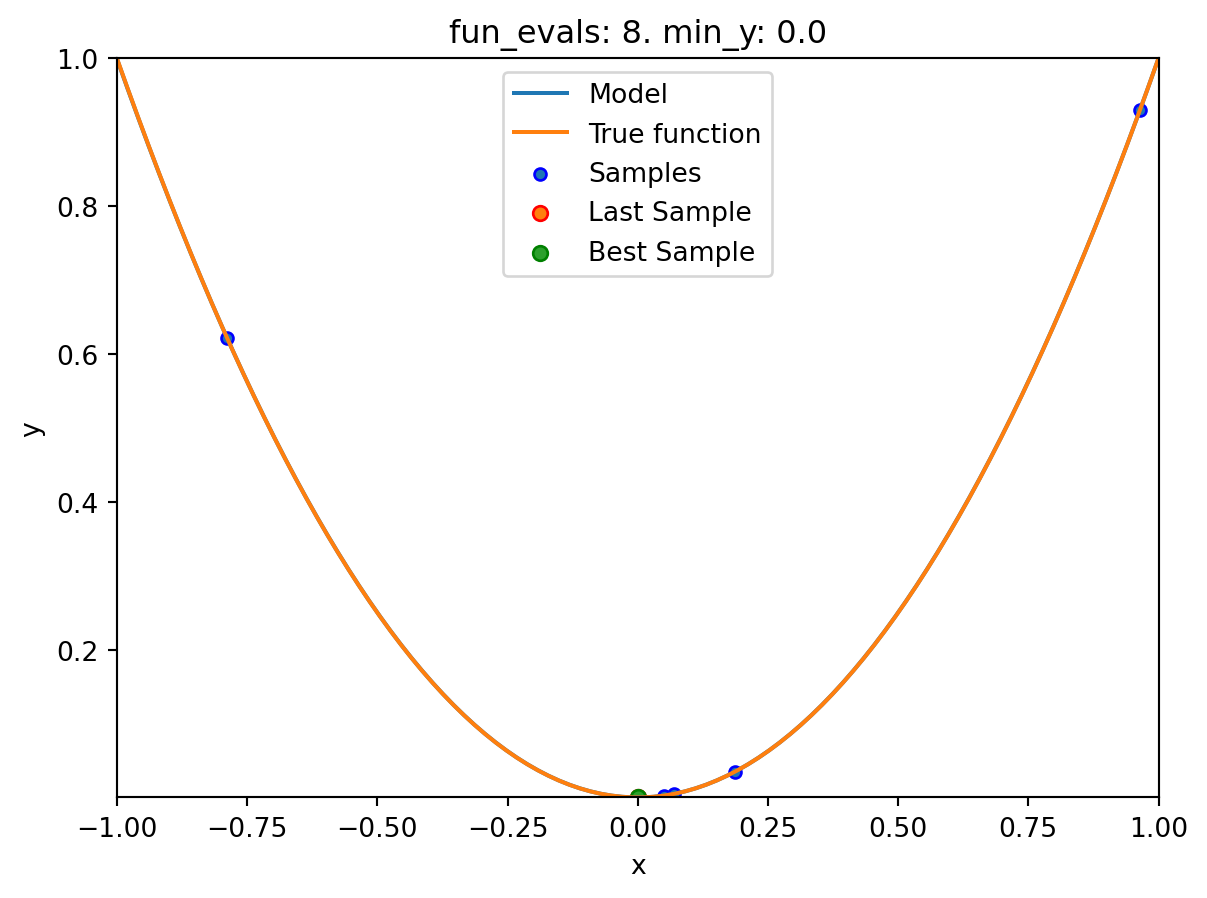

spotPython tuning: 3.2711094860544125e-09 [########--] 80.00% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



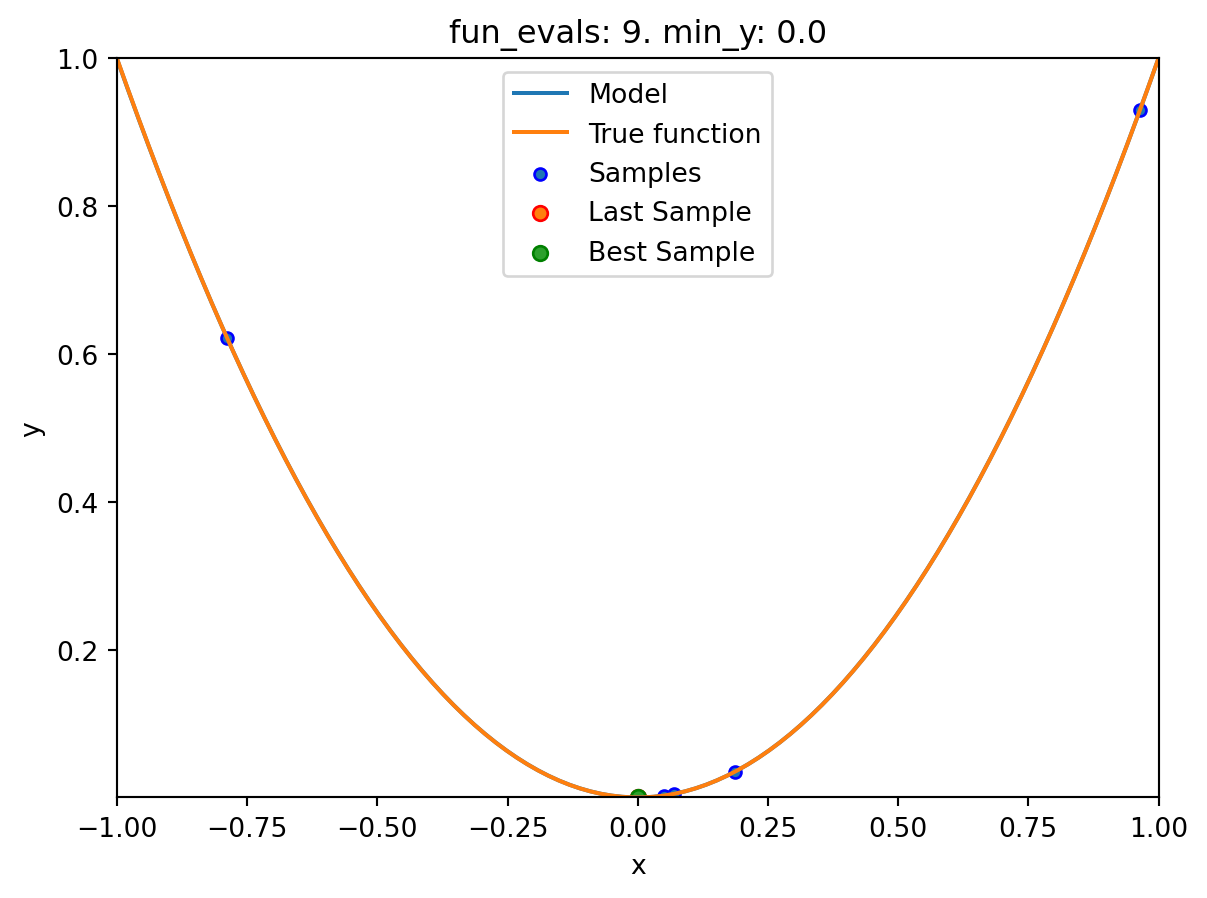

spotPython tuning: 2.2493573831304313e-10 [#########-] 90.00% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



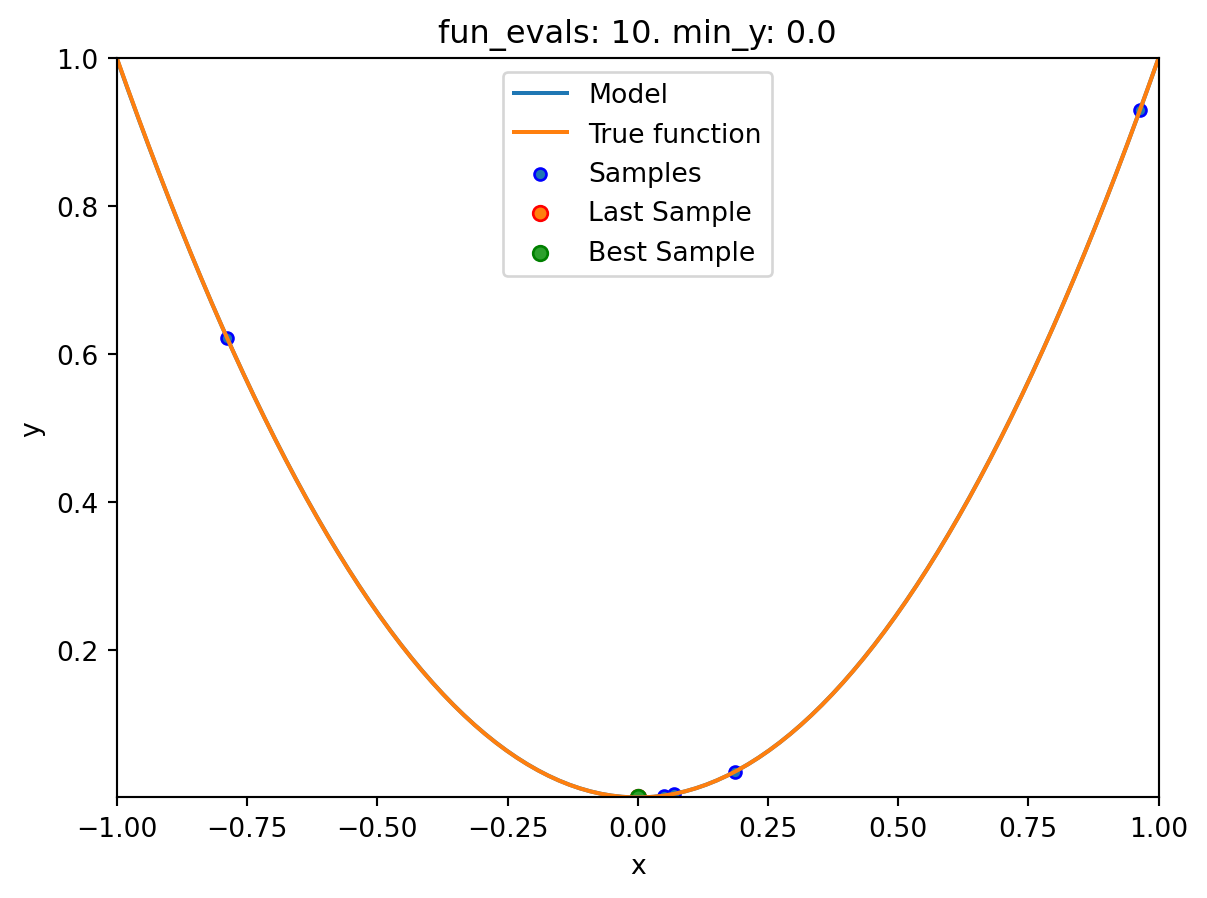

spotPython tuning: 2.2493573831304313e-10 [##########] 100.00% Done...



In [23]:
fun = analytical(seed=123).fun_sphere
spot_1_GP = spot.Spot(fun=fun,
                      fun_control=fun_control,
                      design_control=design_control,
                      surrogate = S_GP)
spot_1_GP.run()

In [24]:
spot_1_GP.print_results()

min y: 2.2493573831304313e-10
x0: 1.499785779079943e-05


[['x0', 1.499785779079943e-05]]

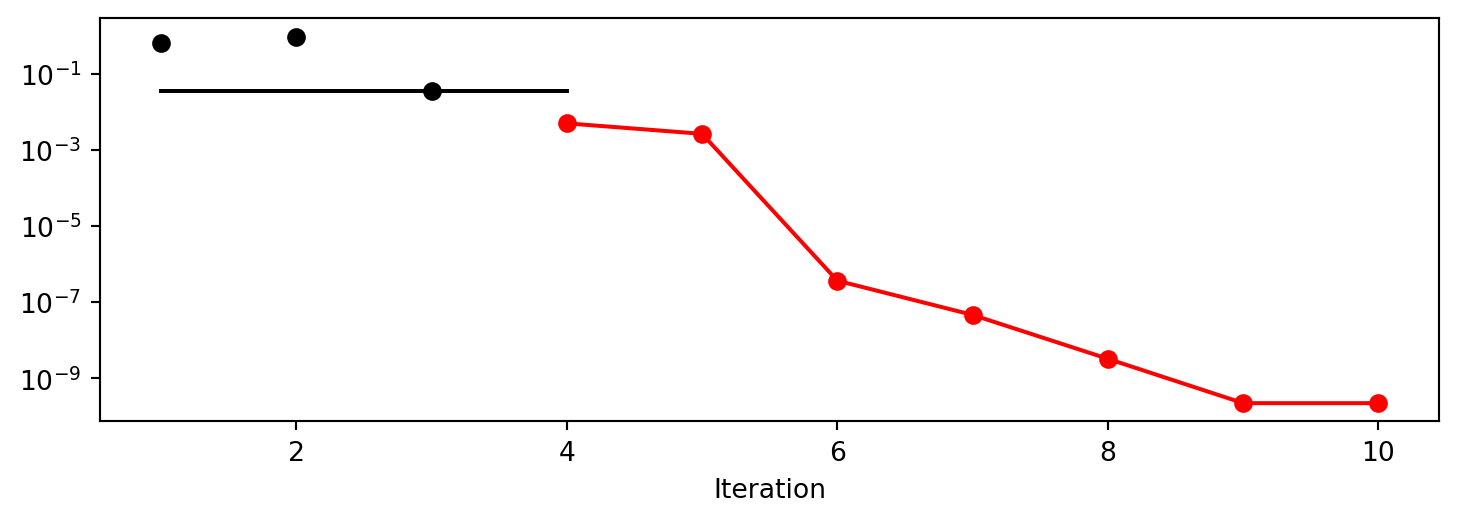

In [25]:
spot_1_GP.plot_progress(log_y=True)

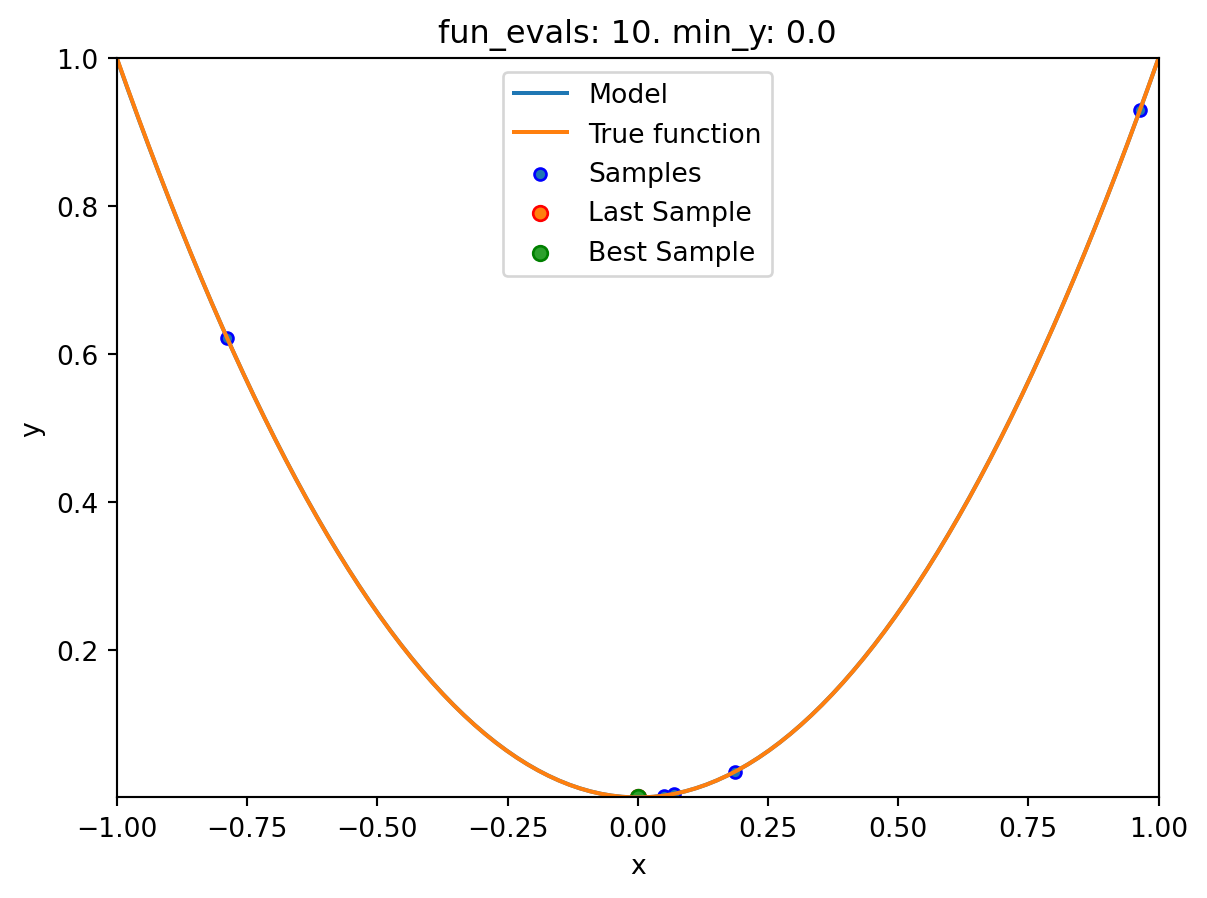

In [26]:
spot_1_GP.plot_model()

## Exercises

### 1. A decision tree regressor: `DecisionTreeRegressor` {#sec-10-exercise-01}

* Describe the surrogate model. Use the information from the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).
* Use the surrogate as the model for optimization.

### 2. A random forest regressor: `RandomForestRegressor` {#sec-10-exercise-02}

* Describe the surrogate model. Use the information from the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).
* Use the surrogate as the model for optimization.

### 3. Ordinary least squares Linear Regression: `LinearRegression` {#sec-10-exercise-03}

* Describe the surrogate model. Use the information from the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
* Use the surrogate as the model for optimization.

### 4. Linear least squares with l2 regularization: `Ridge` {#sec-10-exercise-04}

* Describe the surrogate model. Use the information from the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html).
* Use the surrogate as the model for optimization.

### 5. Gradient Boosting: `HistGradientBoostingRegressor` {#sec-10-exercise-05}

* Describe the surrogate model. Use the information from the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html#sklearn.ensemble.HistGradientBoostingRegressor).
* Use the surrogate as the model for optimization.



### 6. Comparison of Surrogates {#sec-10-exercise-06}

* Use the following two objective functions

  1. the 1-dim sphere function [`fun_sphere`](https://github.com/sequential-parameter-optimization/spotPython/blob/main/src/spotPython/fun/objectivefunctions.py) and
  2. the two-dim Branin function [`fun_branin`](https://github.com/sequential-parameter-optimization/spotPython/blob/main/src/spotPython/fun/objectivefunctions.py):
    
    for a comparison of the performance of the five different surrogates: 
    * `spotPython`'s internal Kriging
    * `DecisionTreeRegressor`
    * `RandomForestRegressor`
    * `linear_model.LinearRegression`
    * `linear_model.Ridge`.

* Generate a table with the results (number of function evaluations, best function value, and best parameter vector) for each surrogate and each function as shown in @tbl-results.

| `surrogate` | `fun` | `fun_evals` | `max_time` | `x_0` | `min_y` | Comments |
|-------------|-------|-------------:|------------|------------------:|---------:|----------|
| `Kriging`     | `fun_sphere` | 10         | `inf`         |          |      |          |
| `Kriging`     | `fun_branin` | 10         | `inf`          |          |      |          |
| `DecisionTreeRegressor`     | `fun_sphere` | 10         | `inf`          |          |      |          |
| ...     | ... | ...         | ...          |          |      |          |
| `Ridge`     | `fun_branin` | 10         | `inf`          |          |      |          |

: Result table {#tbl-results}

* Discuss the results. Which surrogate is the best for which function? Why?


## Selected Solutions

### Solution to Exercise @sec-10-exercise-05: Gradient Boosting


#### Branin: Using SPOT


In [27]:
import numpy as np
from math import inf
from spotPython.fun.objectivefunctions import analytical
from spotPython.utils.init import fun_control_init, design_control_init
from spotPython.spot import spot

* The Objective Function Branin


In [28]:
fun = analytical().fun_branin
PREFIX = "BRANIN"
fun_control = fun_control_init(
    PREFIX=PREFIX,
    lower = np.array([-5,-0]),
    upper = np.array([10,15]),
    fun_evals=20,
    max_time=inf)

design_control = design_control_init(
    init_size=10)

Seed set to 123


Created spot_tensorboard_path: runs/spot_logs/BRANIN_p040025_2024-01-14_15-00-43 for SummaryWriter()


*  Running the surrogate model based optimizer `Spot`:


In [29]:
spot_2 = spot.Spot(fun=fun,
                   fun_control=fun_control,
                   design_control=design_control)
spot_2.run()

spotPython tuning: 3.146824136952164 [######----] 55.00% 


spotPython tuning: 3.146824136952164 [######----] 60.00% 


spotPython tuning: 3.146824136952164 [######----] 65.00% 


spotPython tuning: 3.146824136952164 [#######---] 70.00% 


spotPython tuning: 1.1487233101571483 [########--] 75.00% 


spotPython tuning: 1.0236891516766402 [########--] 80.00% 


spotPython tuning: 0.41994270072214057 [########--] 85.00% 


spotPython tuning: 0.40193544341108023 [#########-] 90.00% 


spotPython tuning: 0.3991519598268951 [##########] 95.00% 


spotPython tuning: 0.3991519598268951 [##########] 100.00% Done...



* Print the results


In [30]:
spot_2.print_results()

min y: 0.3991519598268951
x0: 3.1546575195040987
x1: 2.285931113926263


[['x0', 3.1546575195040987], ['x1', 2.285931113926263]]

*  Show the optimization progress:


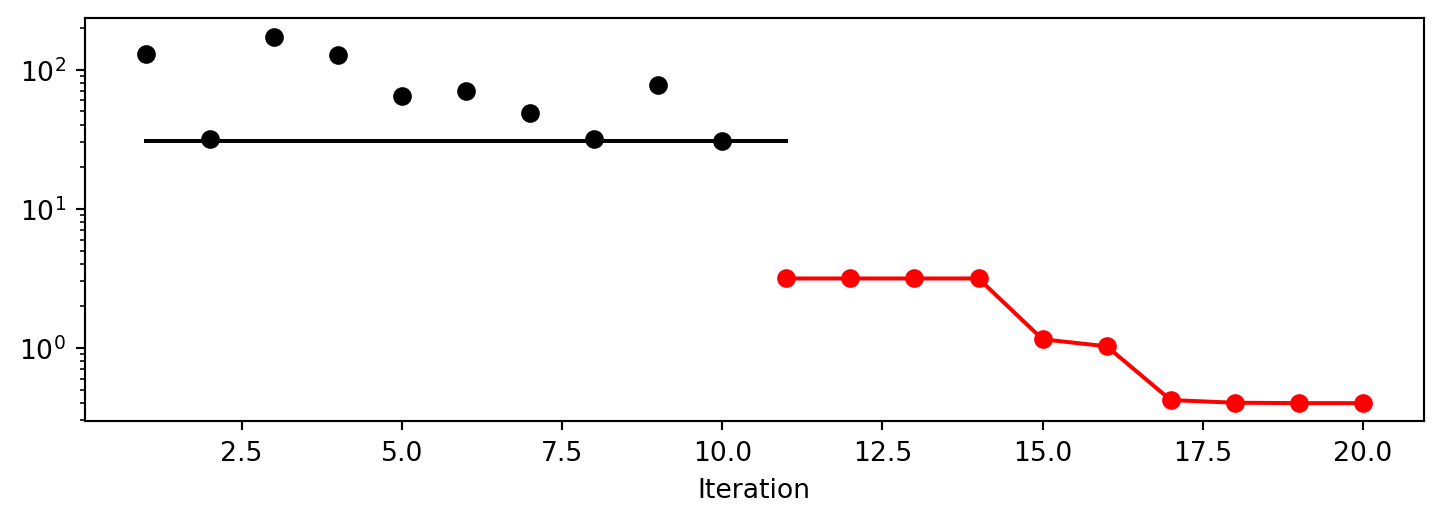

In [31]:
spot_2.plot_progress(log_y=True)

* Generate a surrogate model plot:


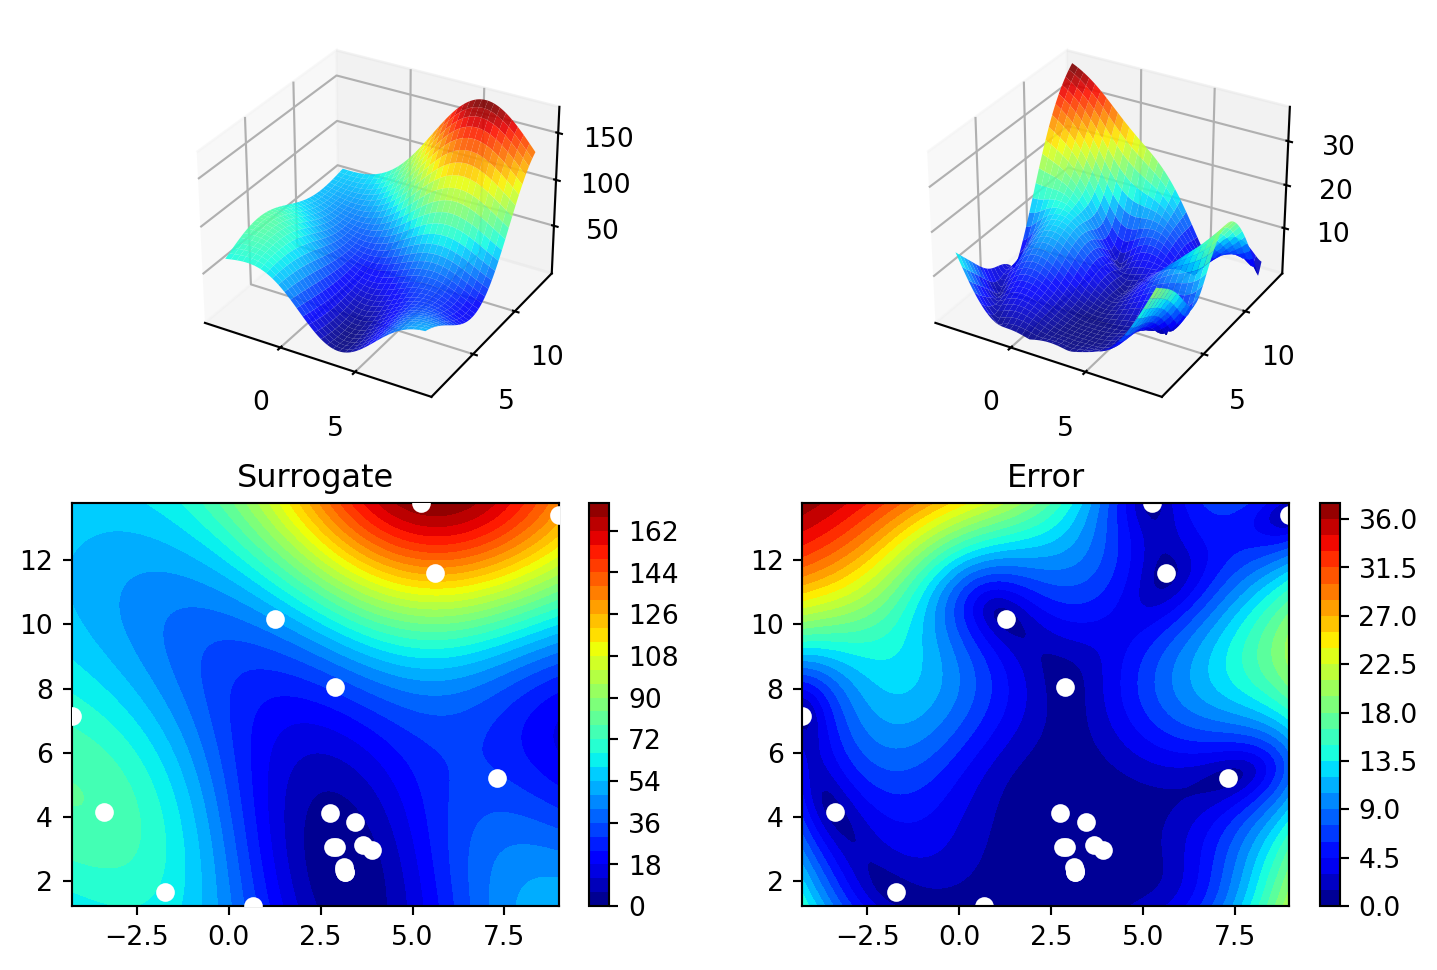

In [32]:
spot_2.surrogate.plot()

#### Branin: Using Surrogates From scikit-learn

* The `HistGradientBoostingRegressor` model from `scikit-learn` is selected:


In [33]:
# Needed for the sklearn surrogates:
from sklearn.ensemble import HistGradientBoostingRegressor
import pandas as pd
S_XGB = HistGradientBoostingRegressor()

* The scikit-learn XGB model `S_XGB` is selected for `Spot` as follows: `surrogate = S_XGB`.
* Similar to the `Spot` run with the internal `Kriging` model, we can call the run with the `scikit-learn` surrogate:


In [34]:
fun = analytical(seed=123).fun_branin
spot_2_XGB = spot.Spot(fun=fun,
                     fun_control=fun_control,
                     design_control=design_control,
                     surrogate = S_XGB)
spot_2_XGB.run()

spotPython tuning: 30.69410528614059 [######----] 55.00% 


spotPython tuning: 30.69410528614059 [######----] 60.00% 


spotPython tuning: 30.69410528614059 [######----] 65.00% 


spotPython tuning: 30.69410528614059 [#######---] 70.00% 


spotPython tuning: 1.3263745845108854 [########--] 75.00% 


spotPython tuning: 1.3263745845108854 [########--] 80.00% 


spotPython tuning: 1.3263745845108854 [########--] 85.00% 


spotPython tuning: 1.3263745845108854 [#########-] 90.00% 


spotPython tuning: 1.3263745845108854 [##########] 95.00% 


spotPython tuning: 1.3263745845108854 [##########] 100.00% Done...



* Print the Results


In [35]:
spot_2_XGB.print_results()

min y: 1.3263745845108854
x0: -2.872730773493426
x1: 10.874313833535739


[['x0', -2.872730773493426], ['x1', 10.874313833535739]]

*  Show the Progress


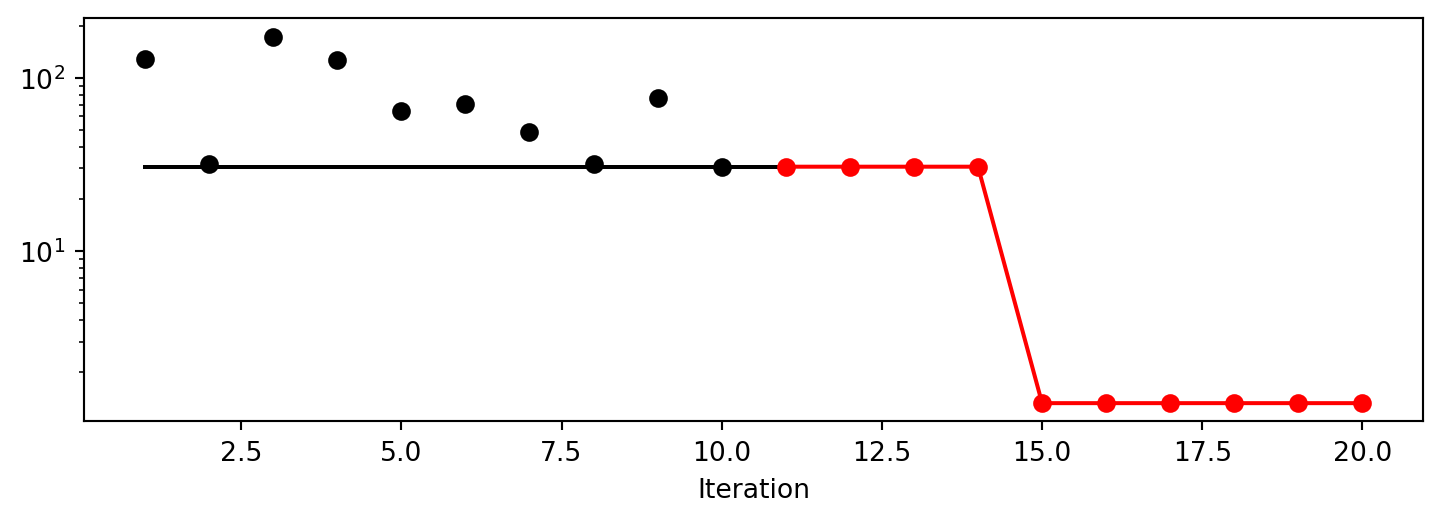

In [36]:
spot_2_XGB.plot_progress(log_y=True)

* Since the `sklearn` model does not provide a `plot` method, we cannot generate a surrogate model plot.


#### One-dimensional Sphere Function With `spotPython`'s Kriging

* In this example, we will use an one-dimensional function, which allows us to visualize the optimization process.
  * `show_models= True` is added to the argument list.


In [37]:
from spotPython.fun.objectivefunctions import analytical
fun_control = fun_control_init(
    lower = np.array([-1]),
    upper = np.array([1]),
    fun_evals=10,
    max_time=inf,
    show_models= True,
    tolerance_x = np.sqrt(np.spacing(1)))
fun = analytical(seed=123).fun_sphere
design_control = design_control_init(
    init_size=3)

Seed set to 123


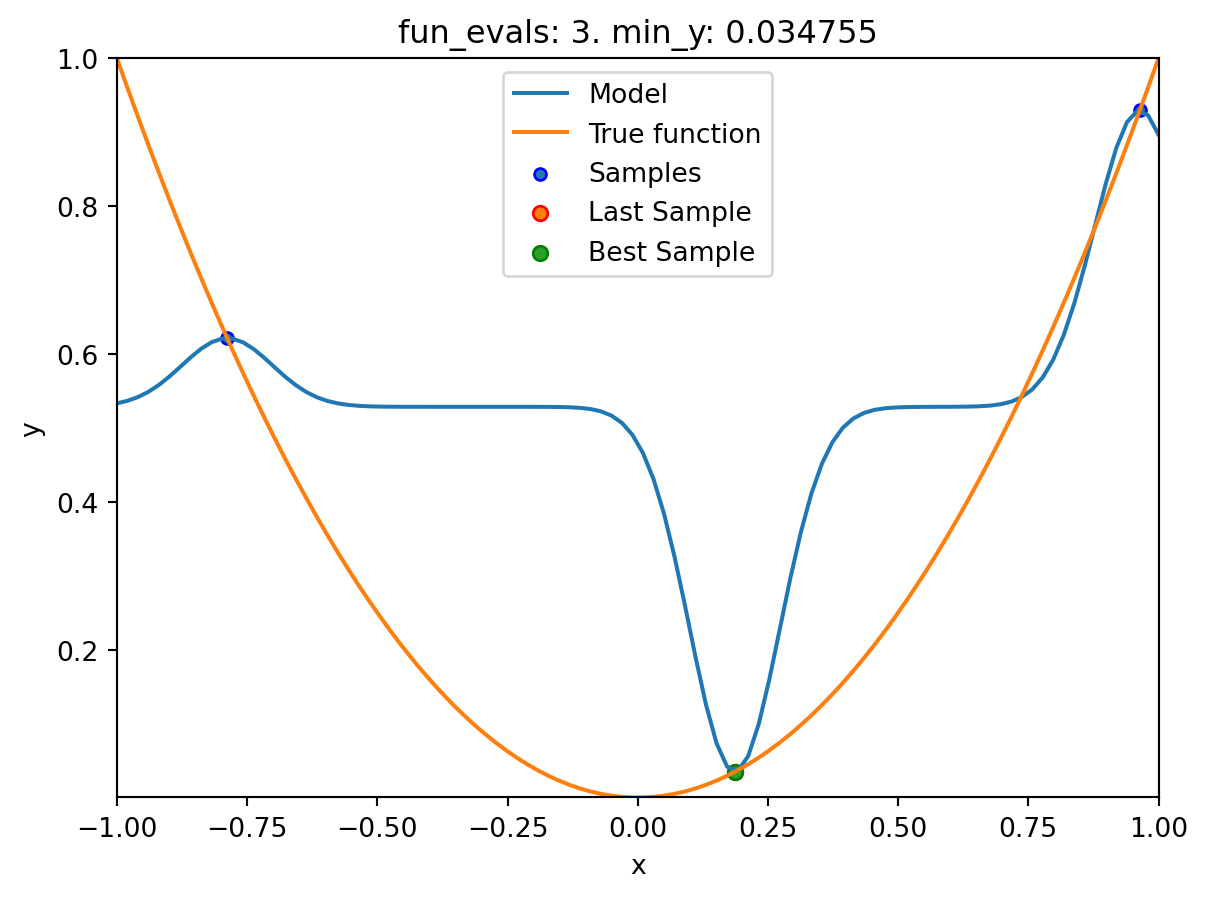

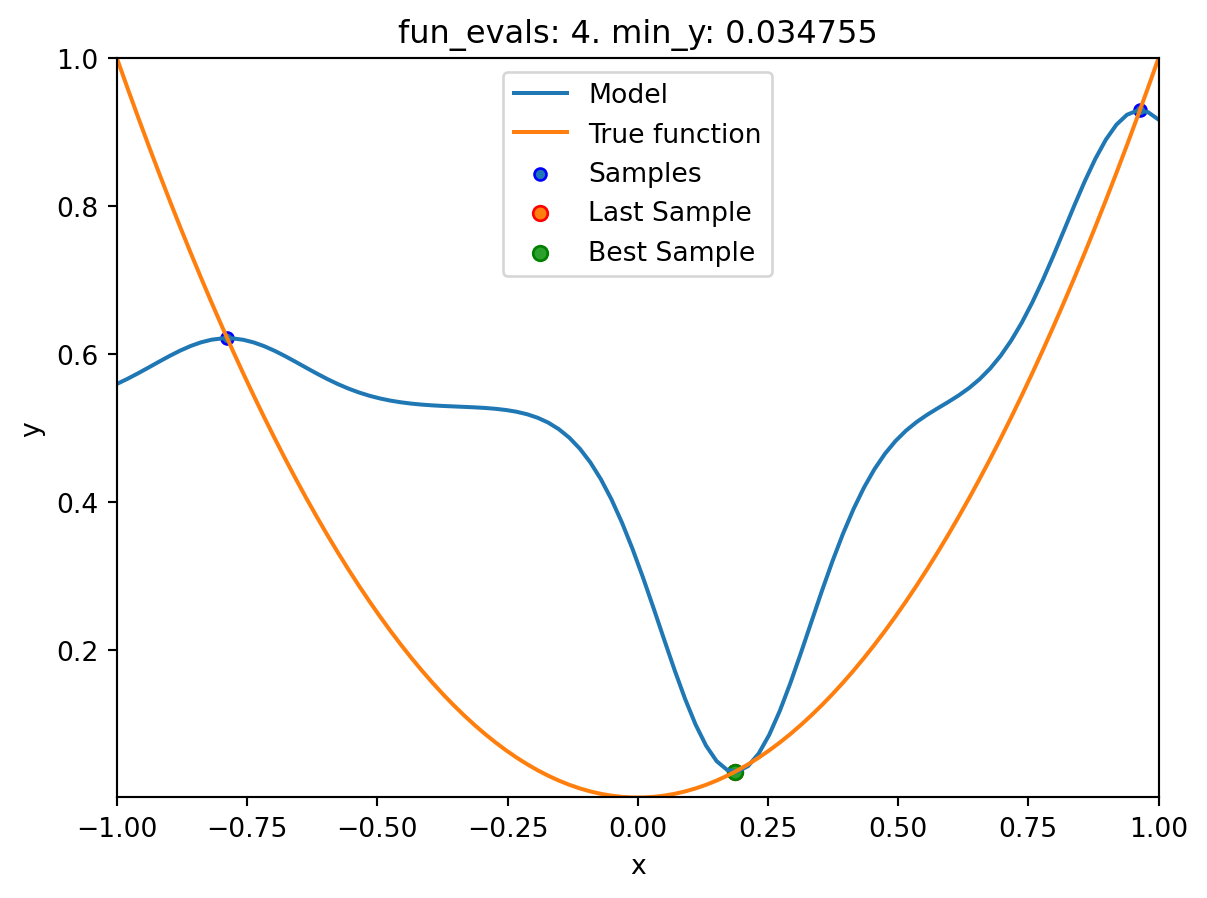

spotPython tuning: 0.03475493366922229 [####------] 40.00% 


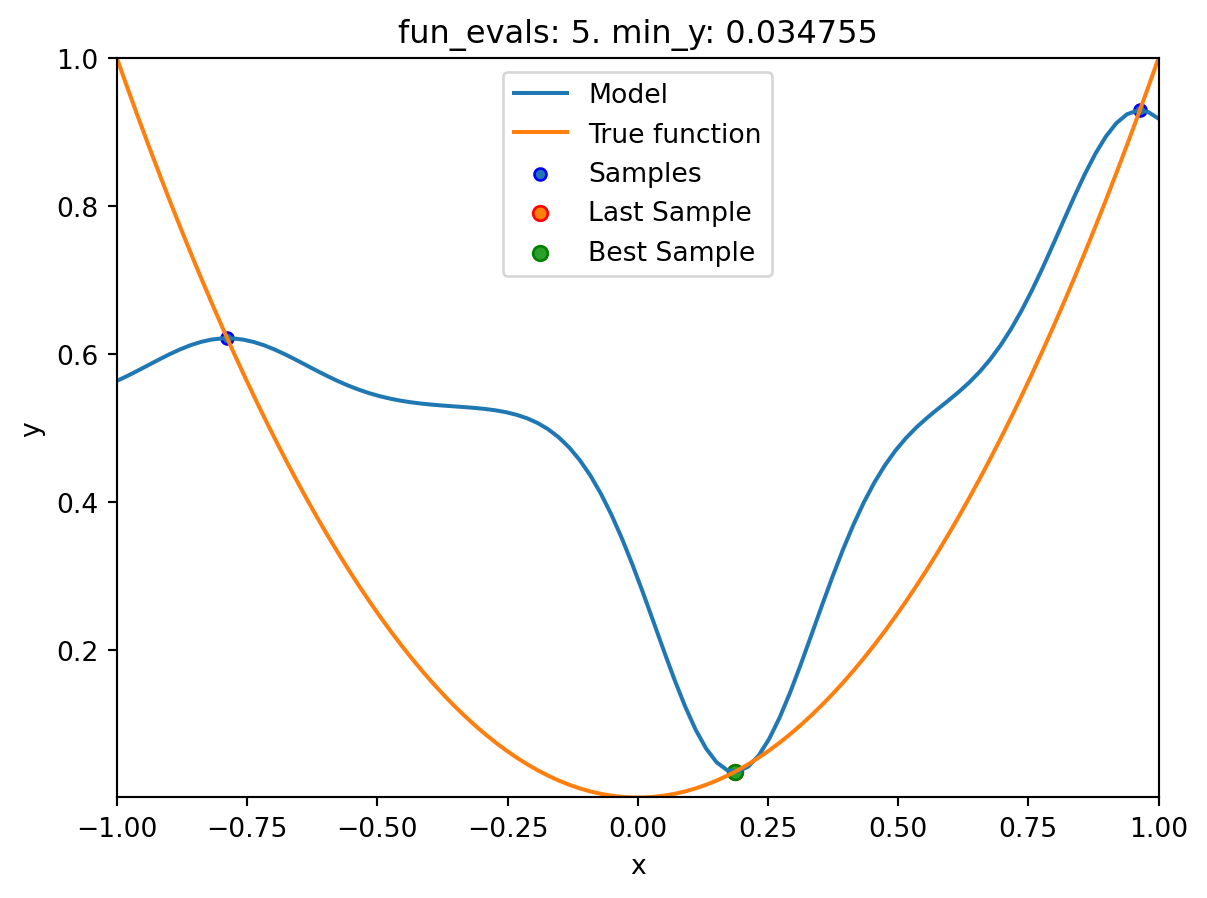

spotPython tuning: 0.03475483461229862 [#####-----] 50.00% 


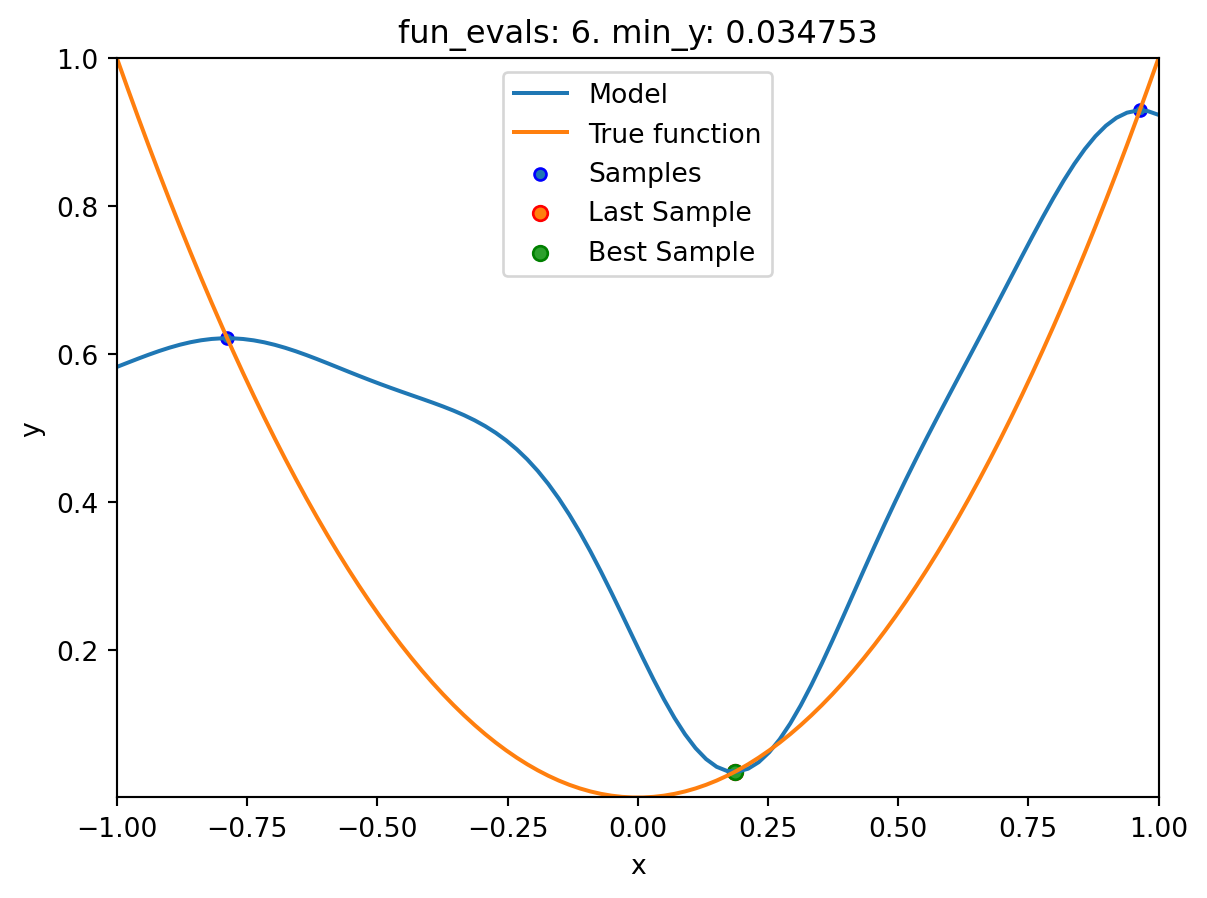

spotPython tuning: 0.03475338954992179 [######----] 60.00% 


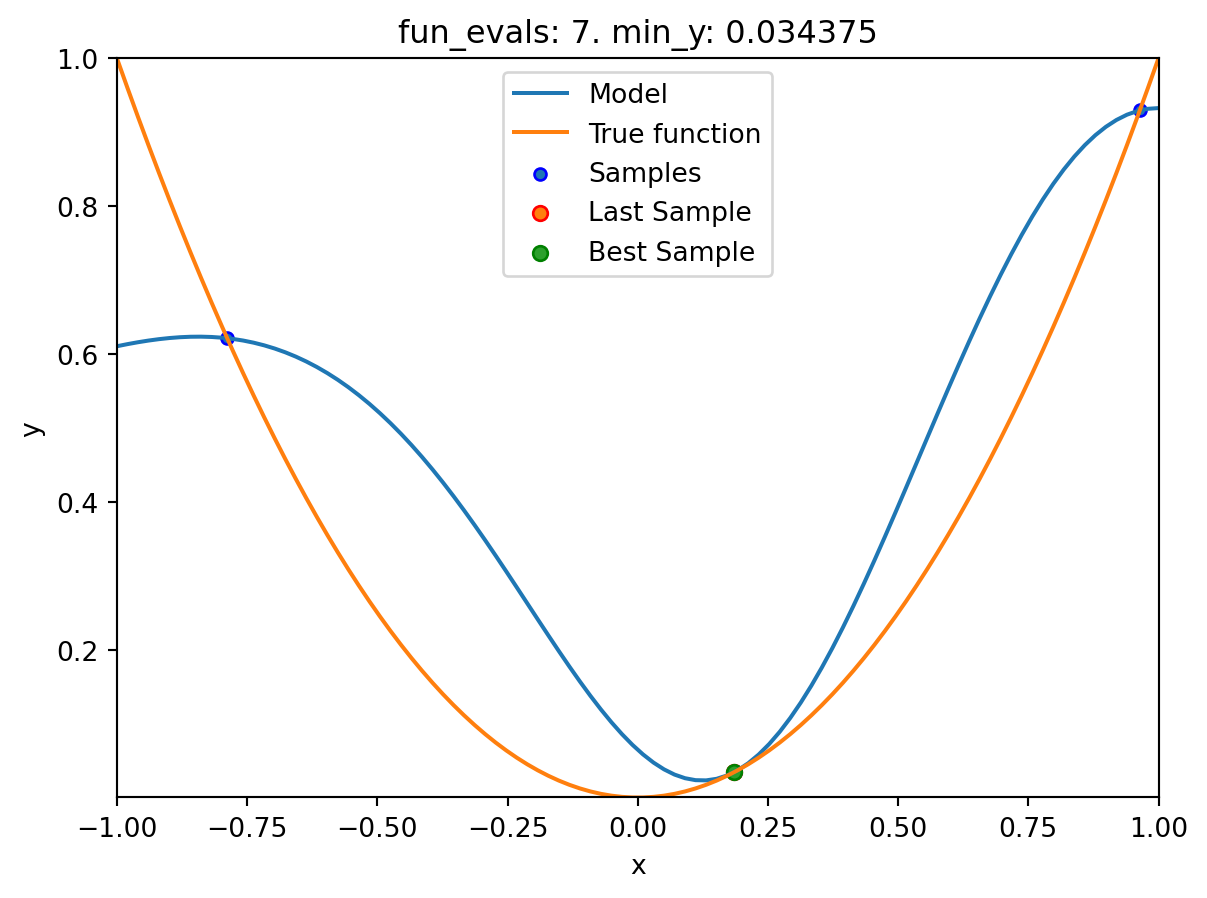

spotPython tuning: 0.03437475313644103 [#######---] 70.00% 


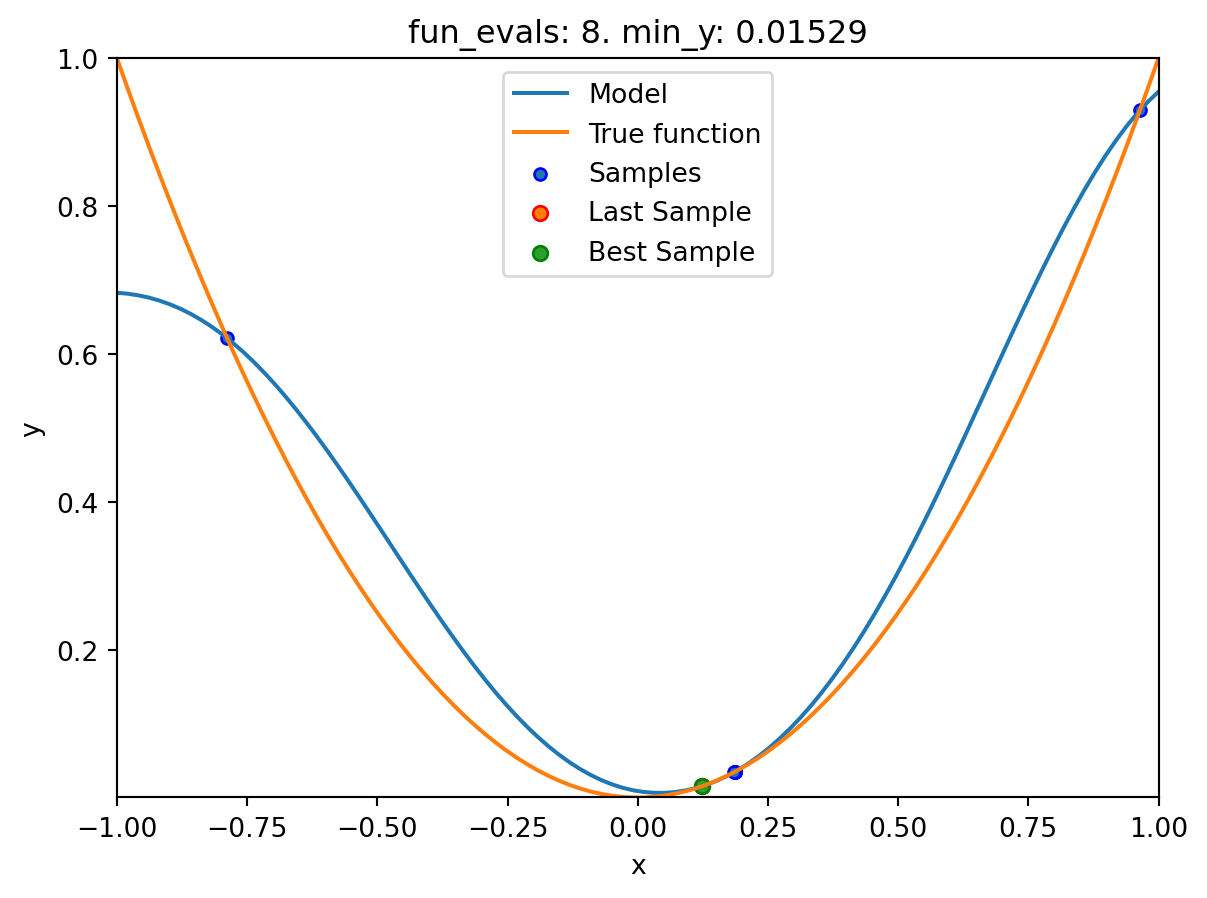

spotPython tuning: 0.015290217643803946 [########--] 80.00% 


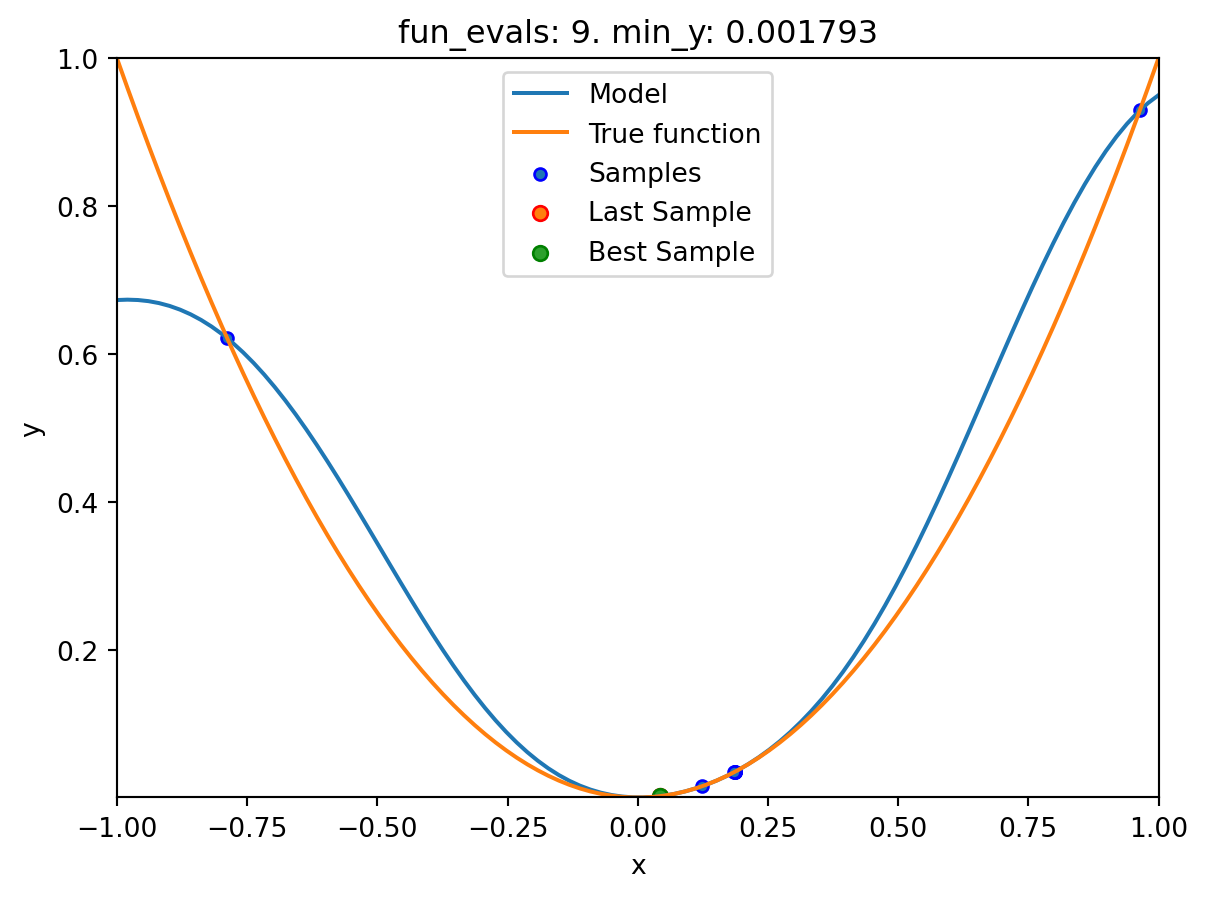

spotPython tuning: 0.0017932523576966073 [#########-] 90.00% 


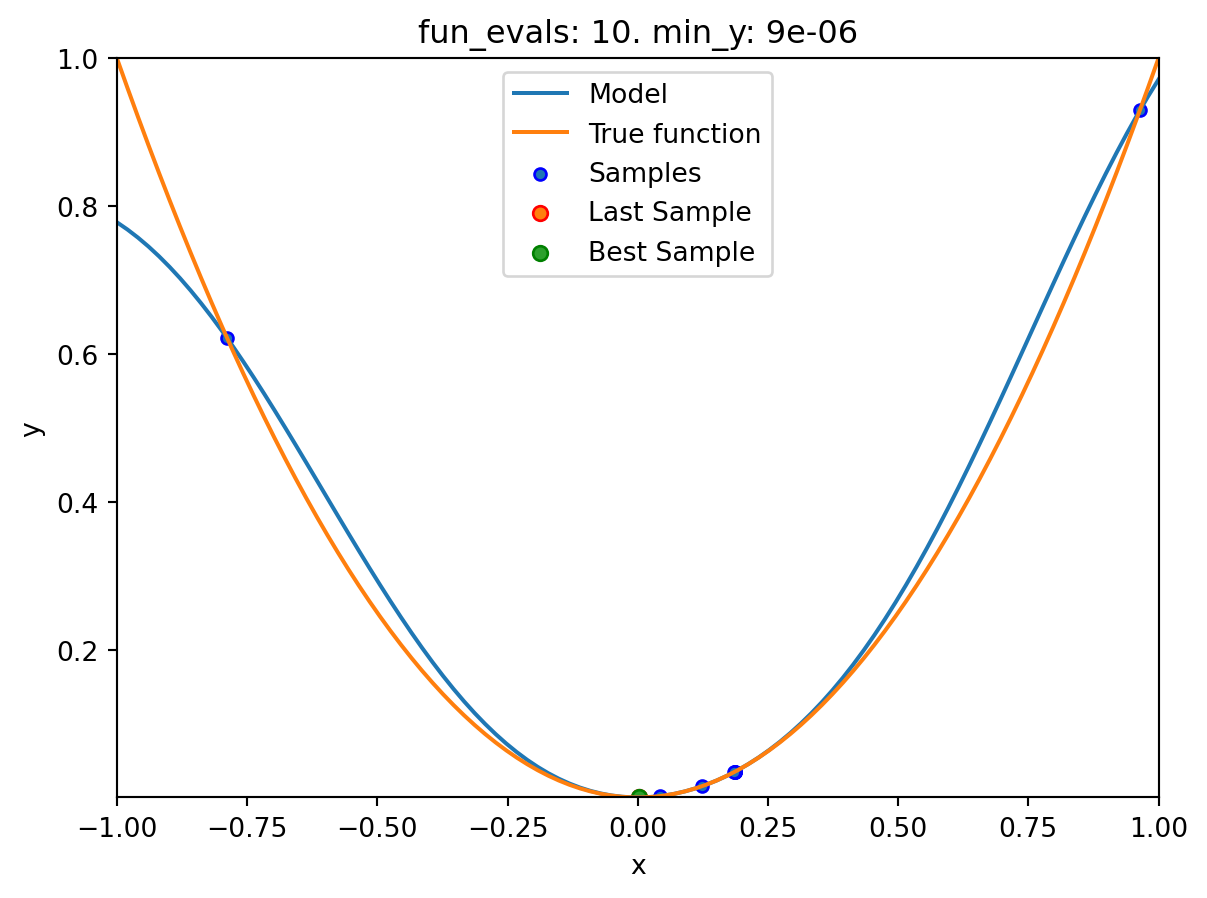

spotPython tuning: 8.771851669068651e-06 [##########] 100.00% Done...



In [38]:
spot_1 = spot.Spot(fun=fun,
                    fun_control=fun_control,
                    design_control=design_control)
spot_1.run()

* Print the Results


In [39]:
spot_1.print_results()

min y: 8.771851669068651e-06
x0: 0.002961731194600322


[['x0', 0.002961731194600322]]

* Show the Progress


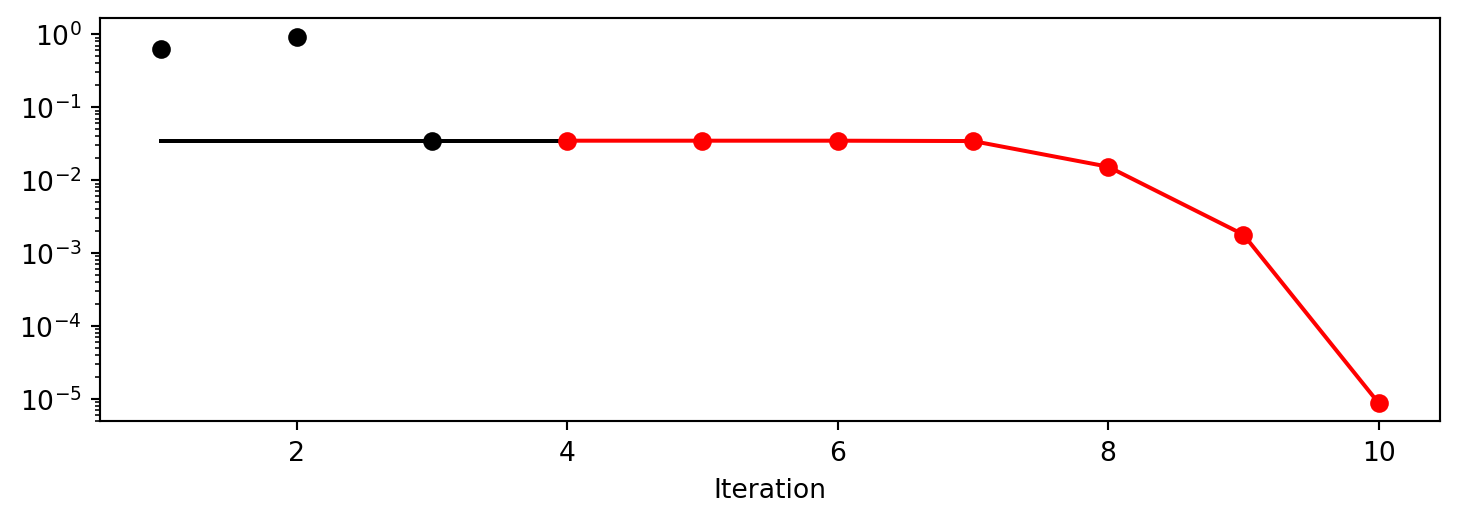

In [40]:
spot_1.plot_progress(log_y=True)

* The method `plot_model` plots the final surrogate:


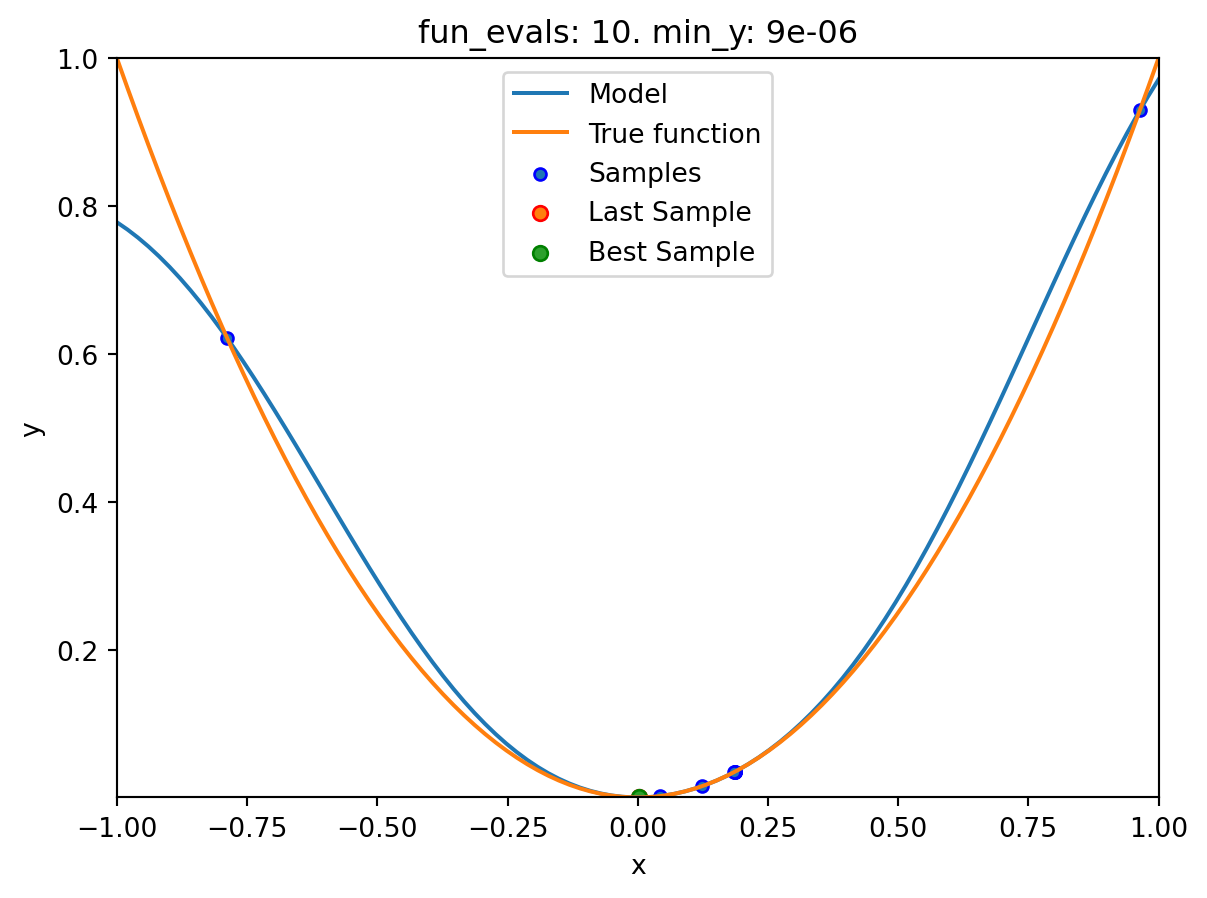

In [41]:
spot_1.plot_model()

#### One-dimensional Sphere Function With `Sklearn` Model HistGradientBoostingRegressor

* This example visualizes the search process on the `HistGradientBoostingRegressor` surrogate from `sklearn`.
* Therefore `surrogate = S_XGB` is added to the argument list.


Seed set to 123


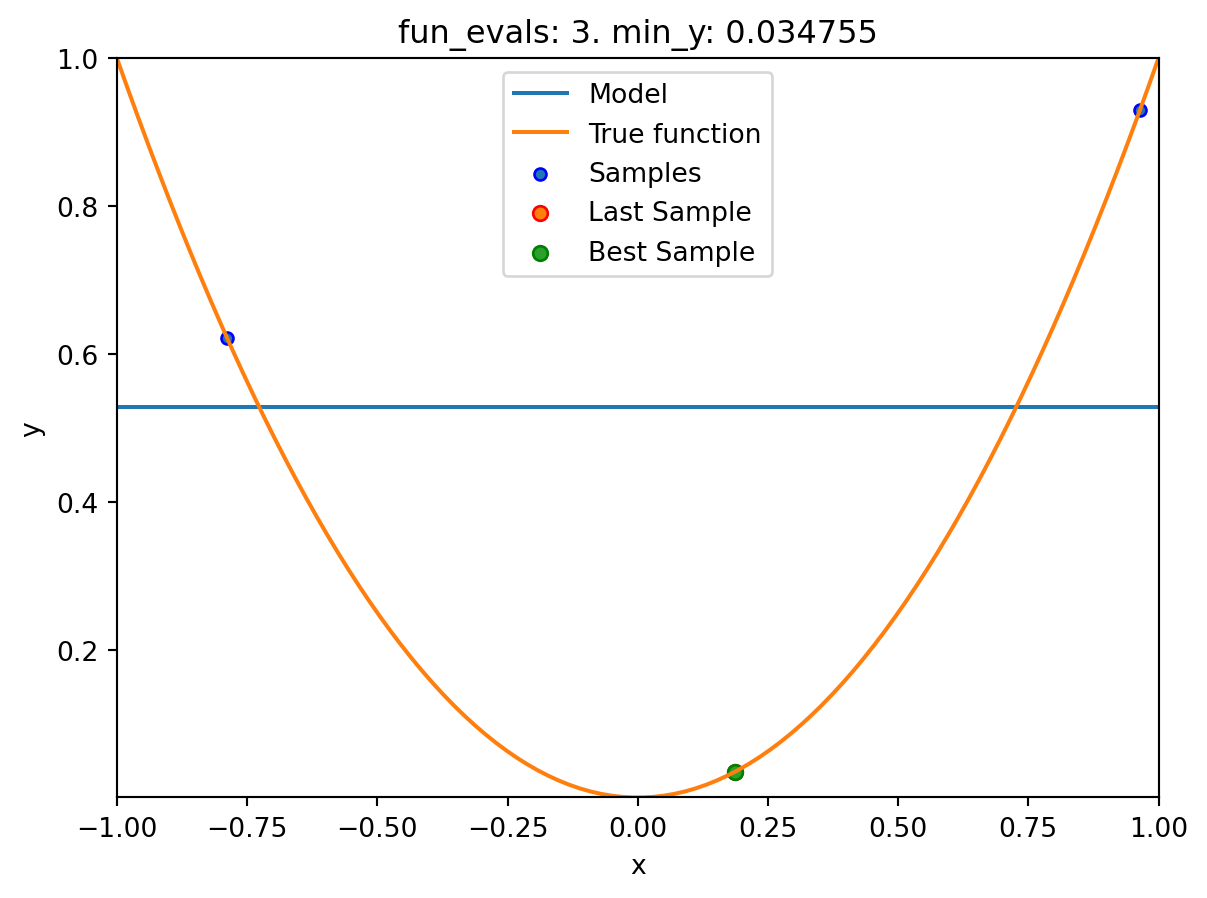

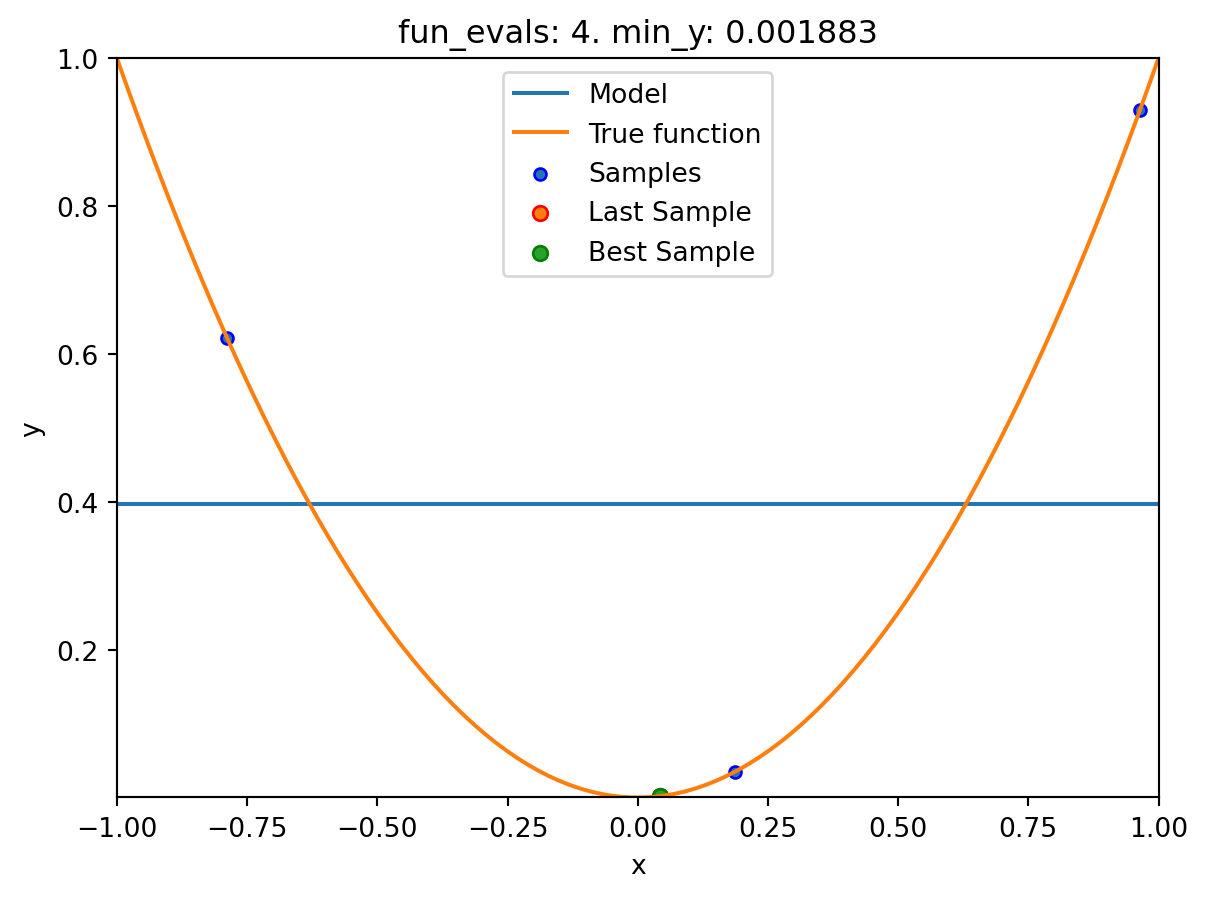

spotPython tuning: 0.0018828816523185745 [####------] 40.00% 


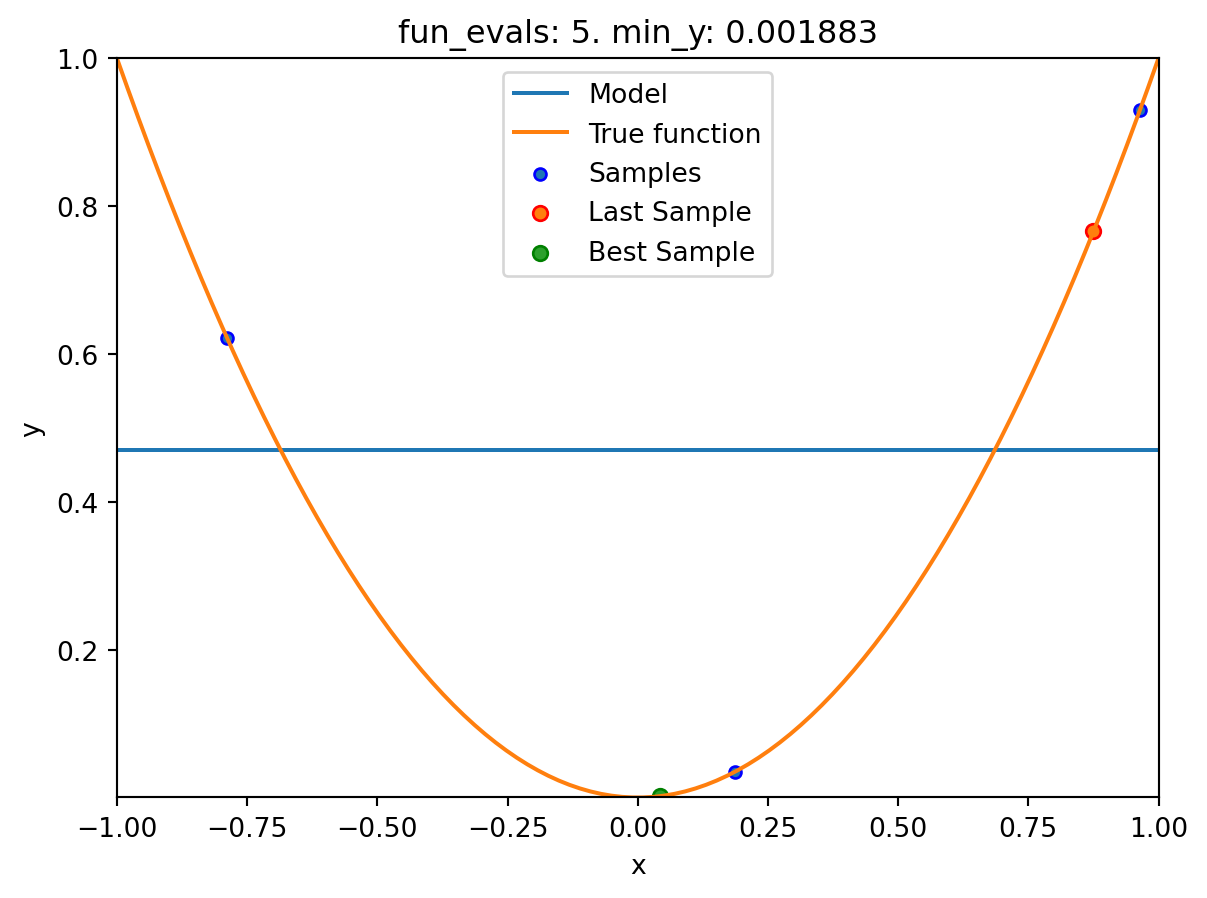

spotPython tuning: 0.0018828816523185745 [#####-----] 50.00% 


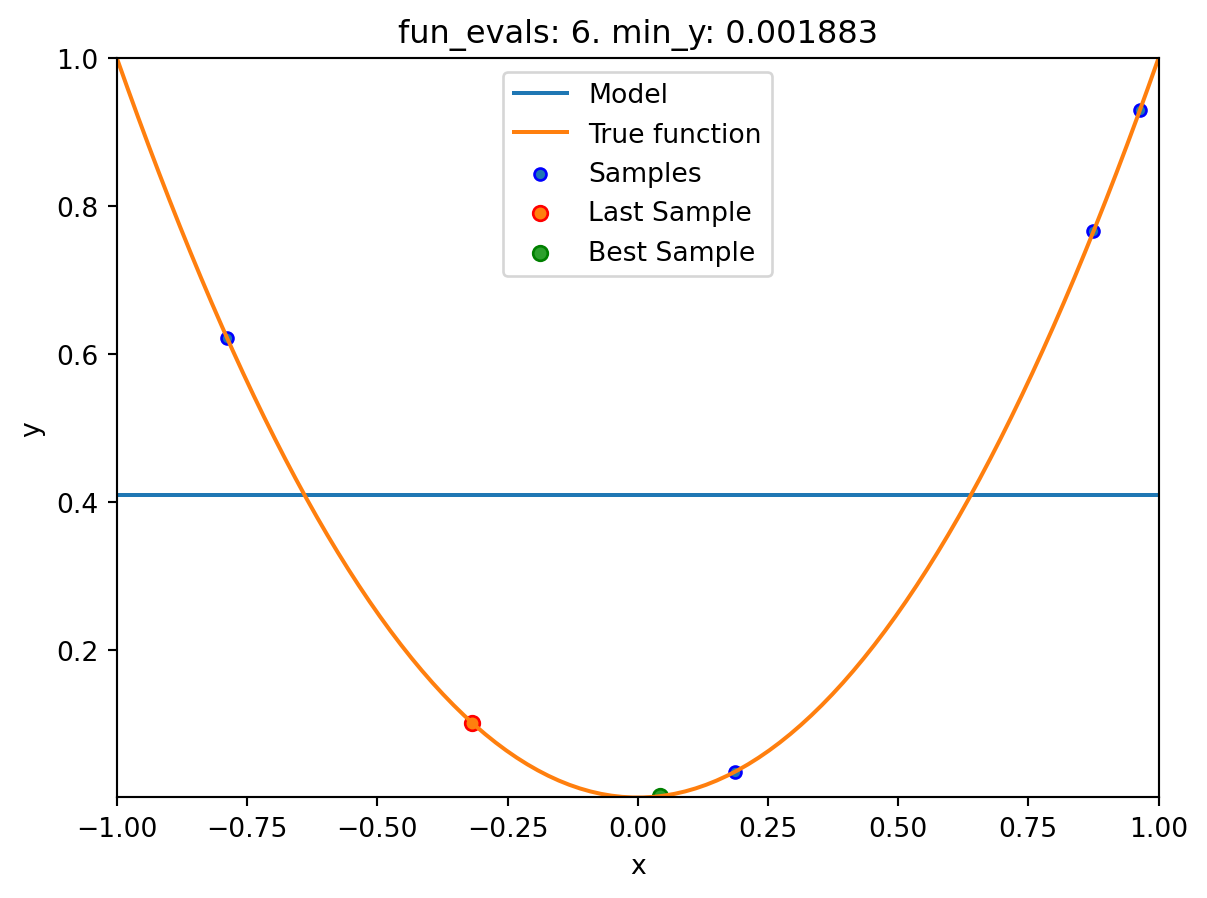

spotPython tuning: 0.0018828816523185745 [######----] 60.00% 


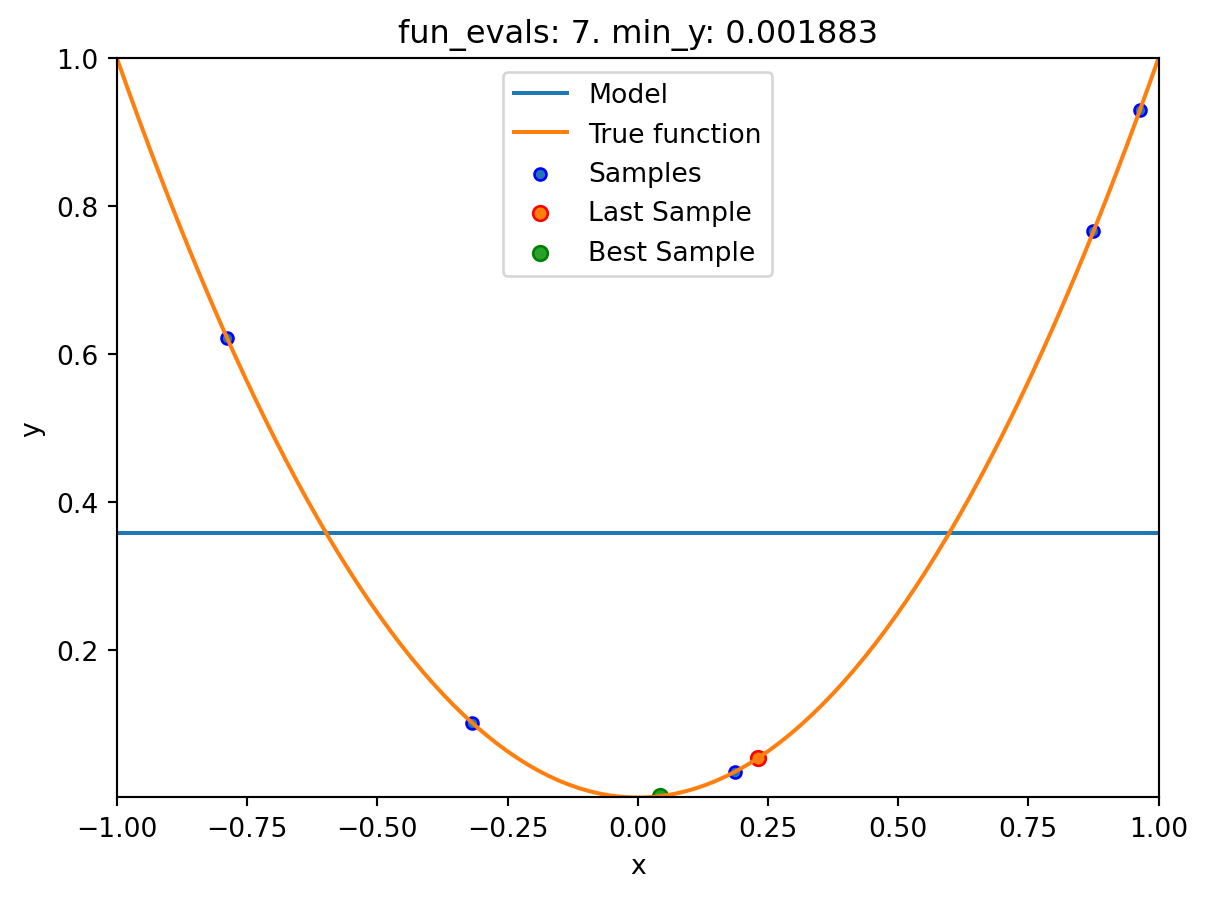

spotPython tuning: 0.0018828816523185745 [#######---] 70.00% 


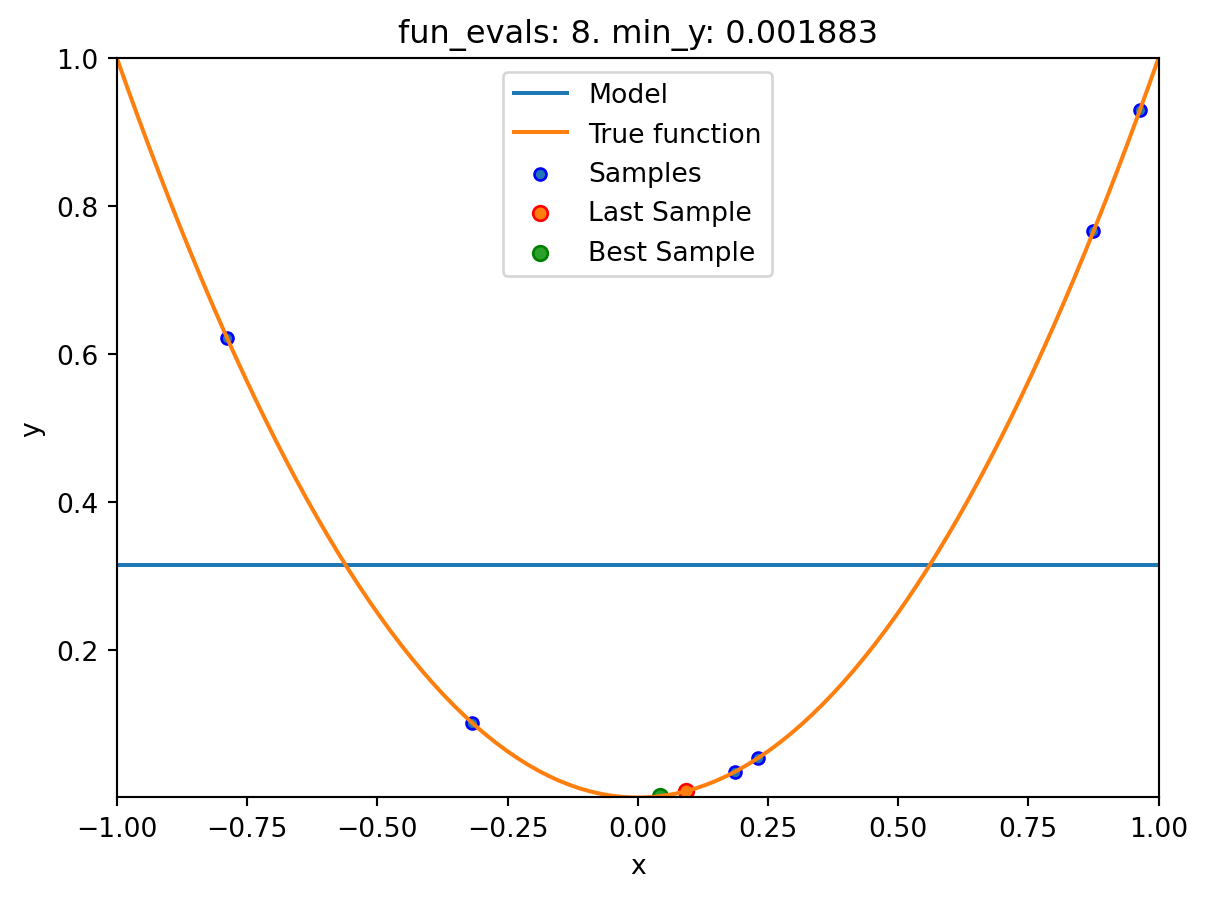

spotPython tuning: 0.0018828816523185745 [########--] 80.00% 


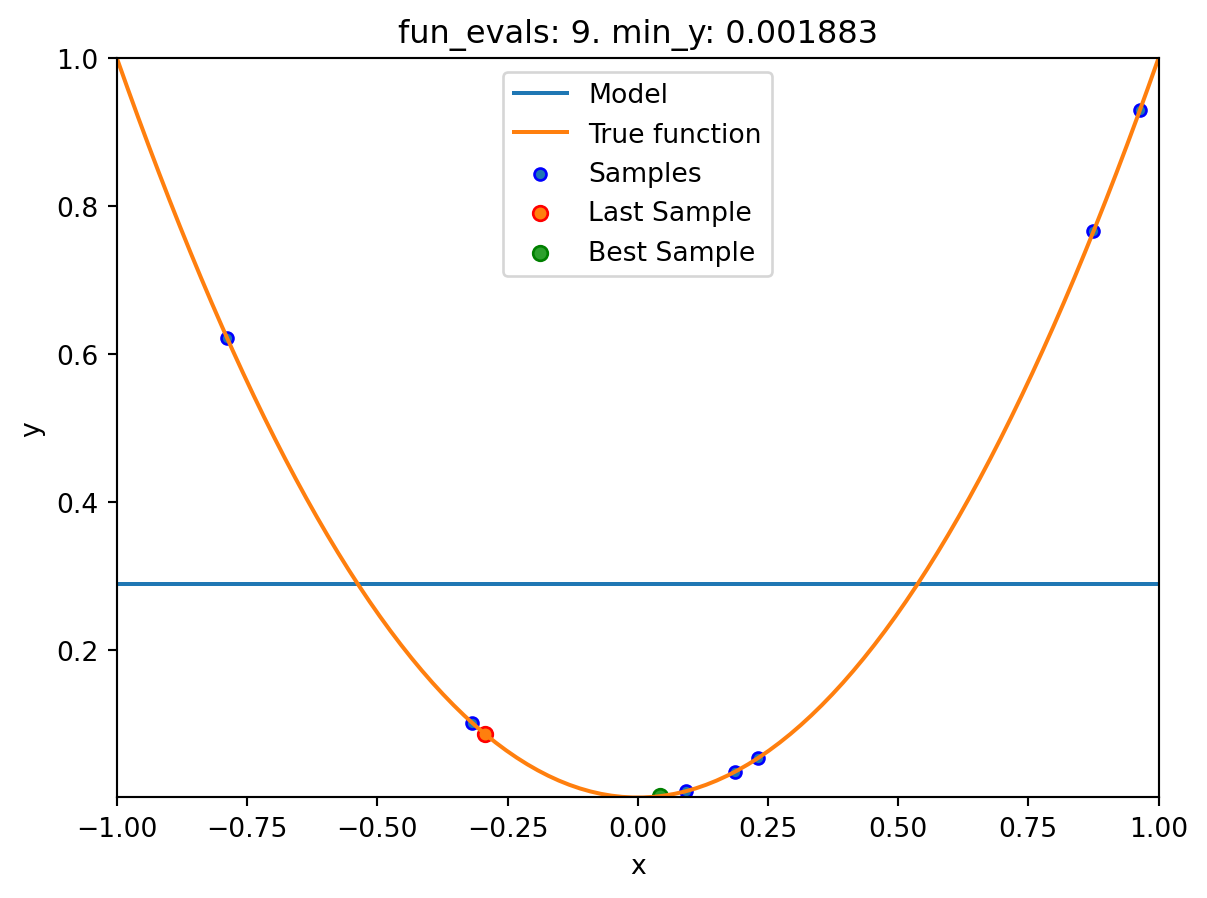

spotPython tuning: 0.0018828816523185745 [#########-] 90.00% 


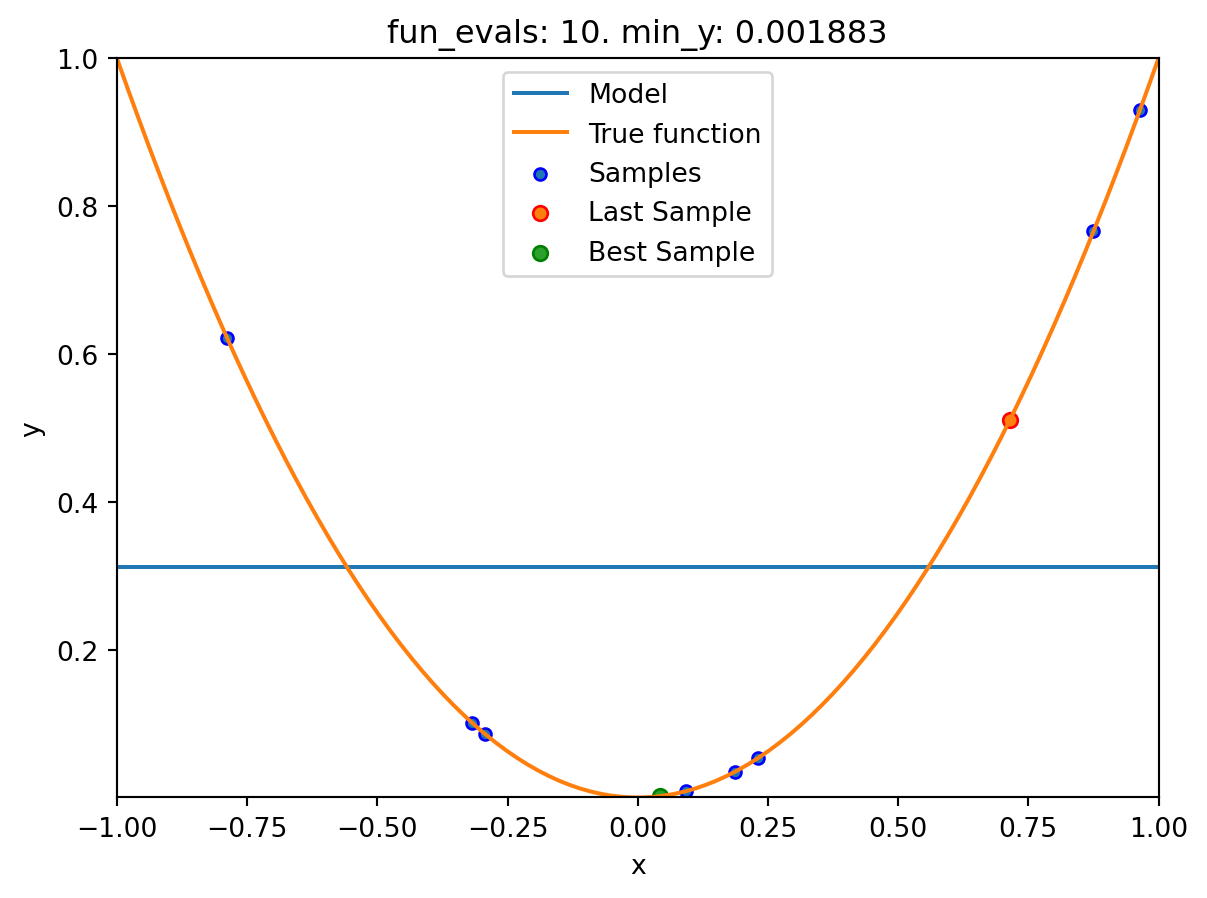

spotPython tuning: 0.0018828816523185745 [##########] 100.00% Done...



In [42]:
fun_control = fun_control_init(
    lower = np.array([-1]),
    upper = np.array([1]),
    fun_evals=10,
    max_time=inf,
    show_models= True,
    tolerance_x = np.sqrt(np.spacing(1)))
fun = analytical(seed=123).fun_sphere
design_control = design_control_init(
    init_size=3)
spot_1_XGB = spot.Spot(fun=fun,
                      fun_control=fun_control,
                      design_control=design_control,
                      surrogate = S_XGB)
spot_1_XGB.run()

In [43]:
spot_1_XGB.print_results()

min y: 0.0018828816523185745
x0: 0.04339218423078717


[['x0', 0.04339218423078717]]

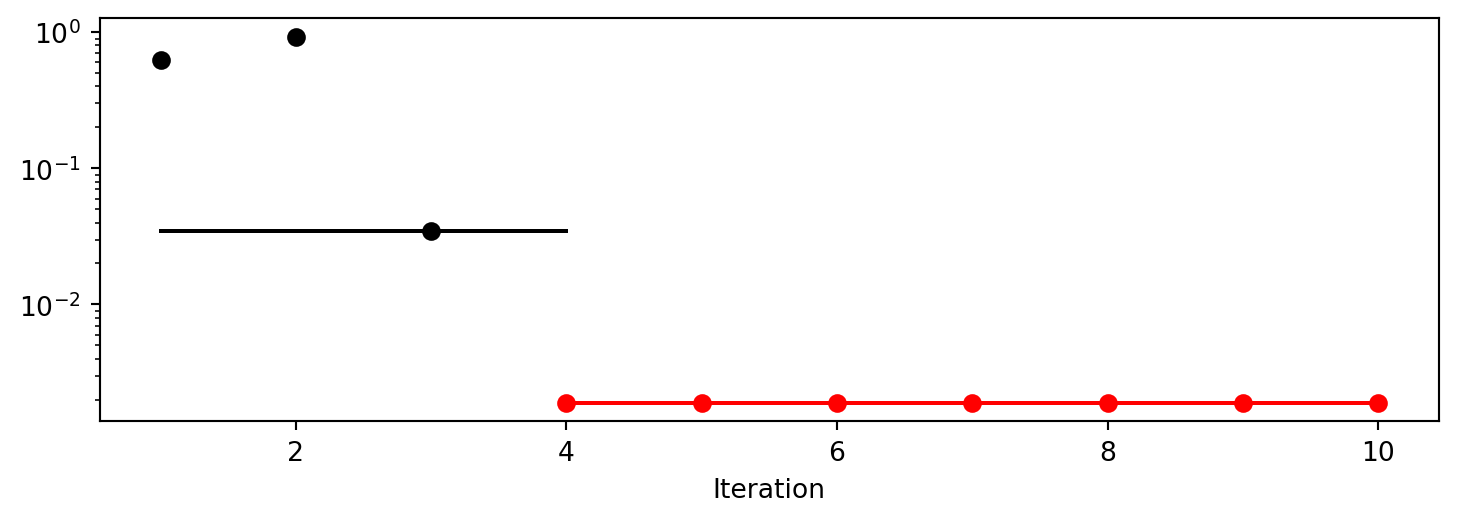

In [44]:
spot_1_XGB.plot_progress(log_y=True)

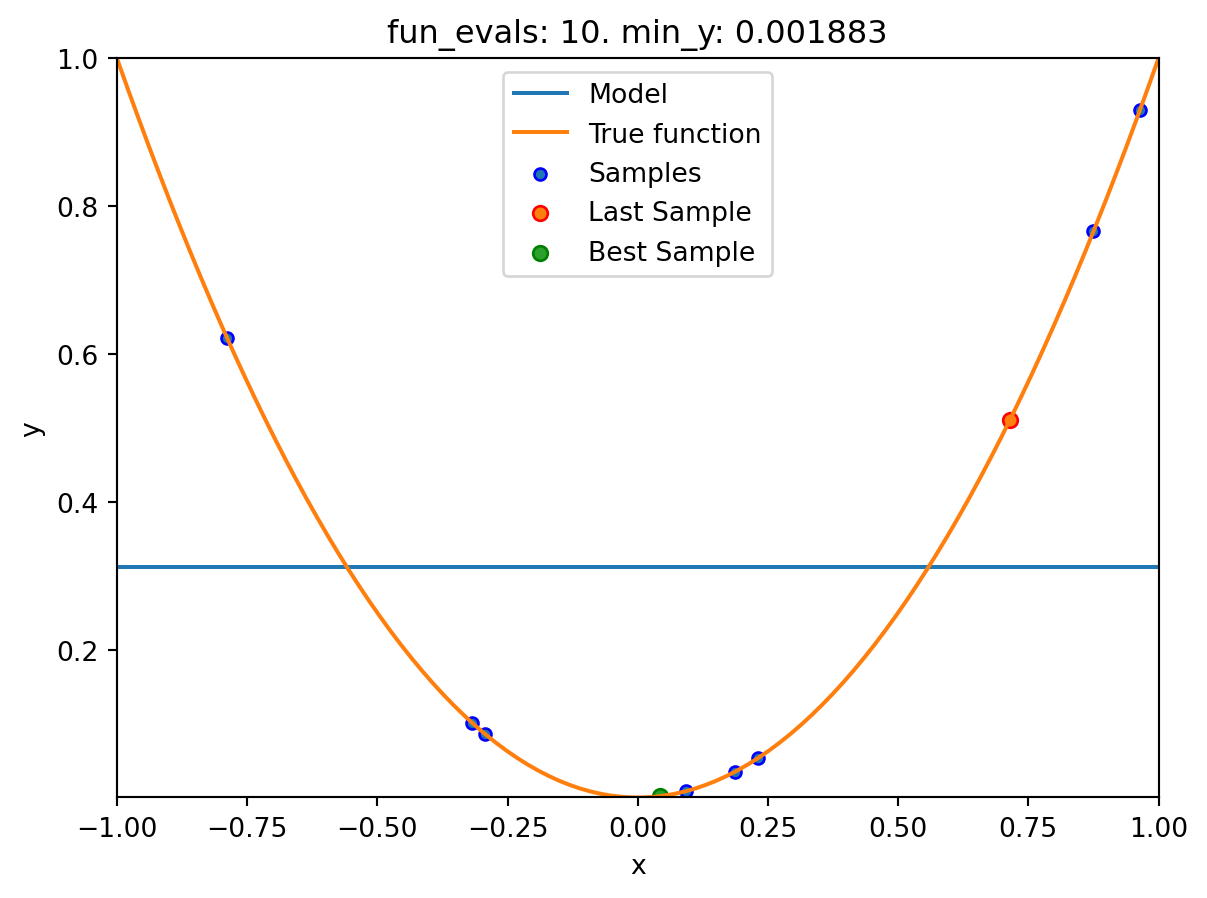

In [45]:
spot_1_XGB.plot_model()

## Jupyter Notebook

:::{.callout-note}

* The Jupyter-Notebook of this lecture is available on GitHub in the [Hyperparameter-Tuning-Cookbook Repository](https://github.com/sequential-parameter-optimization/Hyperparameter-Tuning-Cookbook/blob/main/010_num_spot_sklearn_surrogate.ipynb)

:::